# Cálculo do *VaR* de uma Carteira de Investimentos

## Resumo

Este estudo investiga a eficácia do *Value at Risk (VaR)* como modelo estatístico para prever perdas em portifólio de ativos listados na Bolsa de Valores brasileira (B3). Para isso, utilizamos dados do [*Yahoo Finance*](https://pypi.org/project/yfinance/) do período de 02/01/2007 a 27/06/2024 e uma carteira fictícia composta por 10 ativos de setores diferentes.

O projeto inclui a análise da carteira, análise de eventos extremos conhecidos como "Cisnes Negros" nos retornos e riscos da carteira, identificação desses eventos durante o período analisado, além da realização de *backtesting* de modelos de *VaR* em cenários reais de mercado. Adicionalmente, avaliamos a significância estatística das proporções de acertos na previsão de dias de perda entre diferentes modelos de *VaR* utilizando testes de hipóteses.

## 1. Entendimento do Negócio

### 1.1 Contexto de negócio
O mercado financeiro tem diversas possibilidades de ganhos. No entanto, quando não administramos os riscos associados a esses investimentos, podemos cair em muitas situações indesejadas. Uma ferramenta clássica e amplamente utilizada para avaliar e mitigar esses riscos é o *Value at Risk* (*VaR*).

O *VaR* é uma metodologia de avaliação de risco proposta pelo banco JP Morgan em 1994 que visa quantificar a perda potencial máxima que uma carteira de investimentos pode sofrer dentro de um determinado horizonte de tempo, com base em dados históricos. No entanto, sua aplicação enfrenta críticas, especialmente do renomado autor Nassim Taleb, conhecido por suas obras "O Cisne Negro" e "Antifrágil".

Taleb argumenta que o *VaR* é limitado em sua capacidade de prever eventos extremos, os chamados "Cisnes Negros", que estão fora do escopo das análises tradicionais de risco. Eventos como a pandemia de COVID-19 exemplificam essas ocorrências imprevisíveis que podem ter impactos significativos no mercado financeiro.

Apesar das críticas, o *VaR* continua sendo uma ferramenta amplamente adotada no mercado financeiro.

Vejamos como ele funciona:

Em uma análise histórica de *VaR* com um nível de confiança de 95% (*VaR*<sub>95%</sub>), os resultados históricos reais são organizados em ordem do pior para o melhor e, em seguida, os 5% menores retornos são usados ​​para determinar qual risco esperar.

Supondo para uma carteira de investimentos, um *VaR*<sub>95%</sub> de R\$ 2.000,00, significa que existe 5% de probabilidade da carteira ter uma perda (desvalorização) maior que R\$ 2.000,00 em um dado horizonte de tempo.

### 1.2 Objetivo
Neste estudo, verificaremos se o *VaR* pode ser utilizado como modelo estatístico para prever as perdas futuras de ativos reais listados na bolsa de valores brasileira Brasil, Bolsa e Balcão (B3).

### 1.3 Premissas
Para a simplificação desta análise é importante estabelecer algumas premissas:
- Os retornos dos ativos financeiros seguem uma distribuição normal, o que permite a aplicação de métodos estatísticos para calcular o *VaR*.

- O horizonte de tempo de um semestre considerado na análise é apropriado para capturar o risco de mercado relevante para a carteira de investimentos em questão.

- Os padrões históricos de comportamento do mercado e dos ativos financeiros se repetirão no futuro.

### 1.4 Riscos envolvidos
- **Risco de Interpretação:** A interpretação incorreta das estimativas de *VaR* pode levar a decisões inadequadas de gerenciamento de risco, como subestimar o potencial de perda ou adotar estratégias excessivamente conservadoras.

- **Risco de Eventos Extremos:** A premissa de que o futuro será semelhante ao passado, subjacente ao cálculo do *VaR*, pode não capturar adequadamente eventos extremos ou "Cisnes Negros", resultando em subestimação do verdadeiro risco de perda durante períodos de turbulência do mercado.

### 1.5 Custo vs Benefício
Aqui estão alguns pontos a serem considerados ao avaliar o custo-benefício da análise do *VaR*:

| Dados                    | Custo Tangível | Custo Intangível              | Benefício                               | Nota (Custo) | Nota (Benefício) |
|--------------------------|----------------|-------------------------------|-----------------------------------------|--------------------------|------------------------------|
| Dados históricos do yfinance para análise de *VaR* | Nenhum | Horas de trabalho para preparação e limpeza dos dados | Redução de perdas financeiras por meio de melhor gerenciamento de risco | baixo | alto |

### 1.6 Critério de Sucesso
- Resposta clara à pergunta de negócio.

- Verificação com *backtest* em series semestrais.

- Comparação entre diferentes modelos de *VaR*, como o uso de médias móveis de períodos anteriores versus *VaR* de um único período anterior.

- O erro do modelo deve ser menor que 1% do valor do portifólio (erro < R\$ 10.000,00).

- O modelo deve ser capaz de prever a quantidade de dias de perdas esperadas com pelo menos 90% de taxa de acerto.

### 1.7 Recursos

- [<download>carteira.xlsx](./data/carteira.xlsx)
- [Jupyter Notebook](https://jupyter.org/)
- [Python 3.11.2](https://www.python.org/)
- Bibliotecas Python:
  - [pandas==1.5.3](https://pandas.pydata.org/)
  - [numpy==1.25.2](https://numpy.org/)
  - [matplotlib==3.7.1](https://matplotlib.org/)
  - [seaborn==0.12.2](https://seaborn.pydata.org/)
  - [scipy==1.11.4](https://scipy.org/)
  - [yfinance==0.2.35](https://pypi.org/project/yfinance/)

### 1.8 Planejamento do projeto

O projeto segue a metodologia [CRISP-DM](https://www.preditiva.ai/blog/entenda-o-crisp-dm-suas-etapas-e-como-de-fato-gerar-valor-com-essa-metodologia), uma consolidação das melhores práticas na área de dados, conhecida como *Cross Industry Standard Process for Data Mining*, visando aumentar suas chances de sucesso.

#### 1.8.1 Proposta de solução

Serão coletados dados do *Yahoo Finance* para desenvolver um modelo de *VaR* histórico em Python. Para avaliar a eficácia do modelo *VaR*<sub>95%</sub> em séries semestrais, realizaremos um *backtest* abrangendo o período de 02/01/2007 a 27/06/2024. O objetivo será verificar a frequência com que as perdas ficam dentro dos limites estabelecidos pelo *VaR* e avaliar a consistência do modelo.

O estudo será dividido em quatro partes principais:
  - **Parte 1: Análise Exploratória de Dados (AED)**: Exploração dos dados disponíveis para verificar a qualidade dos dados, identificar padrões, tendências e insights iniciais.

  - **Parte 2: Análise da Carteira**: Performance da carteira, risco e retorno dos ativos e correlação entre os ativos em períodos antes e depois da pandemia.
  
  - **Parte 3: Cálculo do *VaR*<sub>95%</sub> da Carteira**: Cálculo do *VaR*<sub>95%</sub> para cada ativo e carteira geral em período de pandemia.

  - **Parte 4: Desenvolvimento do Modelo *VaR*<sub>95%</sub>**: Desenvolvimento, ajuste e *Backtest* do Modelo *VaR*<sub>95%</sub> em séries semestrais.

#### 1.8.2 Perguntas a serem respondidas
  - Como as empresas da carteira performaram antes e depois da pandemia?

  - Qual o risco dos ativos desta carteira?

  - O risco permaneceu o mesmo antes e depois da pandemia?

  - Os ativos estão correlacionados? 

  - A correlação entre os ativos é igual antes e depois da pandemia?

  - O *VaR* pode ser utilizado como modelo estatístico para prever as perdas futuras de ativos reais listados na Bolsa de Valores?

#### 1.8.3 Hipóteses a serem testadas
  - H1: O risco das ações após a pandemia é estatisticamente maior do que antes da pandemia.

  - H2: Os retornos dos ativos seguem uma distribuição aproximadamente Normal.

  - H3: O *VaR* é menor para a carteira do que para cada ativo individual.

  - H4: O *VaR* médio de vários períodos anteriores é um preditor melhor do que o *VaR* de um único período anterior.

## 2. Entendimento dos Dados

### 2.1 Descrição dos dados

#### 2.1.1 Importações

In [230]:
import pandas as pd
import numpy as np
import yfinance as yf
import locale

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_rel
from scipy.stats import shapiro
from scipy.stats import fisher_exact

In [231]:
# Definir a formatação local para o Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Definir um alias para a função locale.format_string()
def valor(valor):
    return locale.format_string('%.2f', valor, grouping=True)

#### 2.1.2 Lendo o arquivo de dados da carteira

In [232]:
Carteira = pd.read_excel('./data/carteira.xlsx')
Carteira

,Código,Ação,Peso,Setor,Subsetor
0,VALE3,VALE,0.317285,Mats Básicos,Mineração
1,PETR4,PETROBRAS,0.181011,Petróleo,Gás e Biocombustíveis
2,ITUB4,ITAUUNIBANCO,0.166725,Financeiro,Interms Financs
3,ELET3,ELETROBRAS,0.089125,Utilidade Públ,Energ Elétrica
4,ABEV3,AMBEV S/A,0.062038,Consumo Não-Cíclico,Bebidas
5,RENT3,LOCALIZA,0.054199,Diversos,Diversos
6,WEGE3,WEG,0.053712,Bens Indls,Máqs e Equips
7,RADL3,RAIADROGASIL,0.037431,Saúde,Comércio Distr.
8,VIVT3,TELEF BRASIL,0.022171,TI e Telecom,Telecomunicação
9,LREN3,LOJAS RENNER,0.016304,Consumo Cíclico,Comércio


#### 2.1.3 Coleta dos dados do *Yahoo Finance*

In [233]:
# Ajustando os Códigos da ação para o padrão do yfinance
Carteira['Código'] = Carteira['Código']+'.SA'

start='2007-01-01'
end='2024-06-28'

#df_precos = yf.download(list(Carteira['Código']), start=start, end=end, rounding=True )['Adj Close']

# Salvando os dados em .xlsx
#df_precos.to_excel('./data/precos_historicos.xlsx')


# lendo arquivo xlsx
df_precos = pd.read_excel('./data/precos_historicos.xlsx', index_col='Date')

df_precos.head()

,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,
2007-01-02,2.10,11.67,7.19,3.18,6.52,0.26,4.60,14.31,14.19,1.37
2007-01-03,2.09,11.31,7.23,3.17,6.32,0.26,4.57,13.61,13.98,1.37
2007-01-04,2.09,11.31,7.16,3.32,6.18,0.26,4.81,13.39,14.01,1.37
2007-01-05,2.05,10.84,6.88,3.22,5.99,0.26,4.71,12.82,13.86,1.37
2007-01-08,2.09,10.77,7.03,3.16,6.06,0.26,4.81,13.31,13.89,1.37


### 2.2 Análise Exploratória dos Dados

#### 2.2.1 Pré-análise dos dados

**Dados perdidos (*missing data*):**

In [234]:
df_precos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4338 entries, 2007-01-02 to 2024-06-27
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  4338 non-null   float64
 1   ELET3.SA  4338 non-null   float64
 2   ITUB4.SA  4338 non-null   float64
 3   LREN3.SA  4338 non-null   float64
 4   PETR4.SA  4338 non-null   float64
 5   RADL3.SA  4338 non-null   float64
 6   RENT3.SA  4338 non-null   float64
 7   VALE3.SA  4338 non-null   float64
 8   VIVT3.SA  4338 non-null   float64
 9   WEGE3.SA  4338 non-null   float64
dtypes: float64(10)
memory usage: 372.8 KB


Aparentemente, nenhum valor missing na base

**Verificando valores duplicados:**

In [235]:
df_precos.duplicated().sum()

14

In [236]:
# keep=False permite exibir todas as ocorrências duplicadas.
df_precos.loc[df_precos.duplicated(keep=False) == True]

,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,
2009-07-08,2.50,13.93,6.96,2.30,7.98,0.98,2.60,14.65,12.22,1.39
2009-07-09,2.50,13.93,6.96,2.30,7.98,0.98,2.60,14.65,12.22,1.39
2009-12-23,3.45,16.78,9.56,4.04,10.18,1.49,4.00,22.61,12.02,2.01
2009-12-24,3.45,16.78,9.56,4.04,10.18,1.49,4.00,22.61,12.02,2.01
2013-04-25,10.09,3.28,9.32,8.76,5.82,3.82,8.14,18.06,22.34,3.10
2013-04-26,10.09,3.28,9.32,8.76,5.82,3.82,8.14,18.06,22.34,3.10
2013-07-25,10.53,3.20,8.85,7.12,5.21,3.33,7.85,17.08,20.31,3.35
2013-07-26,10.53,3.20,8.85,7.12,5.21,3.33,7.85,17.08,20.31,3.35
2017-05-26,14.77,11.87,17.50,19.03,4.52,12.77,12.39,17.30,22.95,6.64


Investigando se os volumes de negociação na base do yfinance também apresentam duplicações:

In [237]:
df_volume = yf.download(list(Carteira['Código']), start=start, end=end,rounding=True )['Volume']
df_volume.loc[df_precos.duplicated(keep=False) == True]

[*********************100%%**********************]  10 of 10 completed


,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,
2009-07-08,833434,921417,25559276,7119942,21625600,53040,8143862,4673400,5300,6173908
2009-07-09,0,0,0,0,0,0,0,0,0,0
2009-12-23,1193838,951537,8808538,3418430,11004500,1731600,4014707,2962000,3000,2146976
2009-12-24,0,0,0,0,0,0,0,0,0,0
2013-04-25,1066598,2149416,14851683,6353210,35164600,4814160,2597382,5334600,13200,2294344
2013-04-26,0,0,0,0,0,0,0,0,0,0
2013-07-25,701564,2026969,18046762,4547398,37212500,8306480,2041697,6825500,4400,2668172
2013-07-26,0,0,0,0,0,0,0,0,0,0
2017-05-26,11820600,1483763,27228150,6750266,63326900,10252840,3678170,2957000,3300,6779240


No *DataFrame* `df_precos`, notamos que em algumas datas os valores de `Adj Close` são idênticos aos do dia útil anterior, enquanto no *DataFrame* `df_volume` essas datas apresentam ausência de volume de negociação. Essa ocorrência é geralmente atribuída a algumas razões:
- Falha ou falta de dados: Em alguns casos, a falta de dados ou falhas na transmissão de dados podem resultar em valores idênticos aos do dia anterior.

- Feriados: Se um feriado nacional ou um evento especial aconteceu e a bolsa de valores estava fechada, os dados retornados pelo *Yahoo Finance* podem ser idênticos aos do dia anterior, já que não houve atividade de negociação.

Neste caso, devemos remover os dias sem volume de negociação da nossa base de preços:

In [238]:
# drop_duplicates, por padrão, elimina duplicatas, exceto a primeira ocorrência.
df_precos.drop_duplicates(inplace=True)

In [239]:
df_precos.duplicated().sum()

0

#### 2.2.2 Normalização dos dados para comparação dos ativos

Ativos financeiros podem ter preços muito diferentes, dificultando a comparação direta. Normalizando os preços, eliminaremos as diferenças de magnitude, permitindo uma comparação mais justa. No entanto, primeiramente é essencial definir o horizonte de tempo da análise para identificar a data inicial.

In [240]:
# Obtendo o índice onde '2020-02-26' está localizado (data em que o Ministério da Saúde confirmou o primeiro caso do novo coronavírus no Brasil)
split_index = df_precos.index.get_loc('2020-02-26')

amostra = 180

# Separando uma amostra de 181 pregões antes do início da pandemia e 180 depois.
df_precos_antes_depois = df_precos.iloc[split_index - amostra - 1 : split_index + amostra]


# Normalizando os dados
df_precos_normalizados = df_precos_antes_depois / df_precos_antes_depois.iloc[0]
df_precos_normalizados.head()

,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,
2019-06-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-06-05,1.003511,0.987430,0.980647,0.986412,0.987859,0.982212,0.988182,0.985345,0.987314,0.993213
2019-06-06,1.016854,1.024148,0.990852,0.996242,1.003311,0.988399,1.007879,0.993452,0.974310,0.993213
2019-06-07,1.015449,1.021833,1.001407,1.025441,1.022075,1.015468,1.020909,0.990645,0.971139,1.009050
2019-06-10,1.017556,1.006285,0.988740,1.034981,1.017660,1.030936,1.019091,0.984097,1.002220,1.011312


In [241]:
# Preços dos Ativos da Carteira ao Longo do Tempo

# Criar o gráfico de linha
fig = px.line(df_precos_normalizados, x=df_precos_normalizados.index, y=df_precos_normalizados.columns, title='Evolução dos Preços dos Ativos da Carteira ao Longo do Tempo')

# Adicionar rótulos aos eixos
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Preço Normalizado'
)

# Adicionar barra de ajuste de tempo (sliders)
fig.update_layout(
    autosize=True,  # Largura do gráfico responsivo
    height=600,   # Altura do gráfico

    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    legend_title_text='Ativos'  # Alterar o título da legenda
)

# Formatar etiquetas dos dados
fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

# Mostrar o gráfico
fig.show()


No gráfico acima, podemos acompanhar a trajetória dos preços dos ativos da carteira ao longo do tempo, todos partindo do mesmo ponto inicial. Com esses dados, estaremos preparados para abordar as questões de negócios na próxima etapa.

#### 2.2.3 Análise da Carteira

Nesta etapa, responderemos às seguintes perguntas:
- Como as empresas da carteira performaram antes e depois da pandemia?

- Qual o risco dos ativos desta carteira?

- O risco permaneceu o mesmo antes e depois da pandemia?

- Os ativos estão correlacionados? 

- A correlação entre os ativos é igual antes e depois da pandemia?

##### 2.2.3.1 Performance da carteira

**Como as empresas da carteira performaram antes e depois da pandemia?**

> 📌 Nota: Considerou-se "antes da pandemia" o preço até 26/02/2020 (data em que o Ministério da Saúde confirmou o primeiro caso do novo coronavírus no Brasil) e "depois da pandemia" a partir de 27/02/2020.

In [242]:
# Separando os dados antes e depois da pandemia
antes_pandemia = df_precos_normalizados.iloc[:amostra+1]
depois_pandemia = df_precos_normalizados.iloc[amostra+1:]

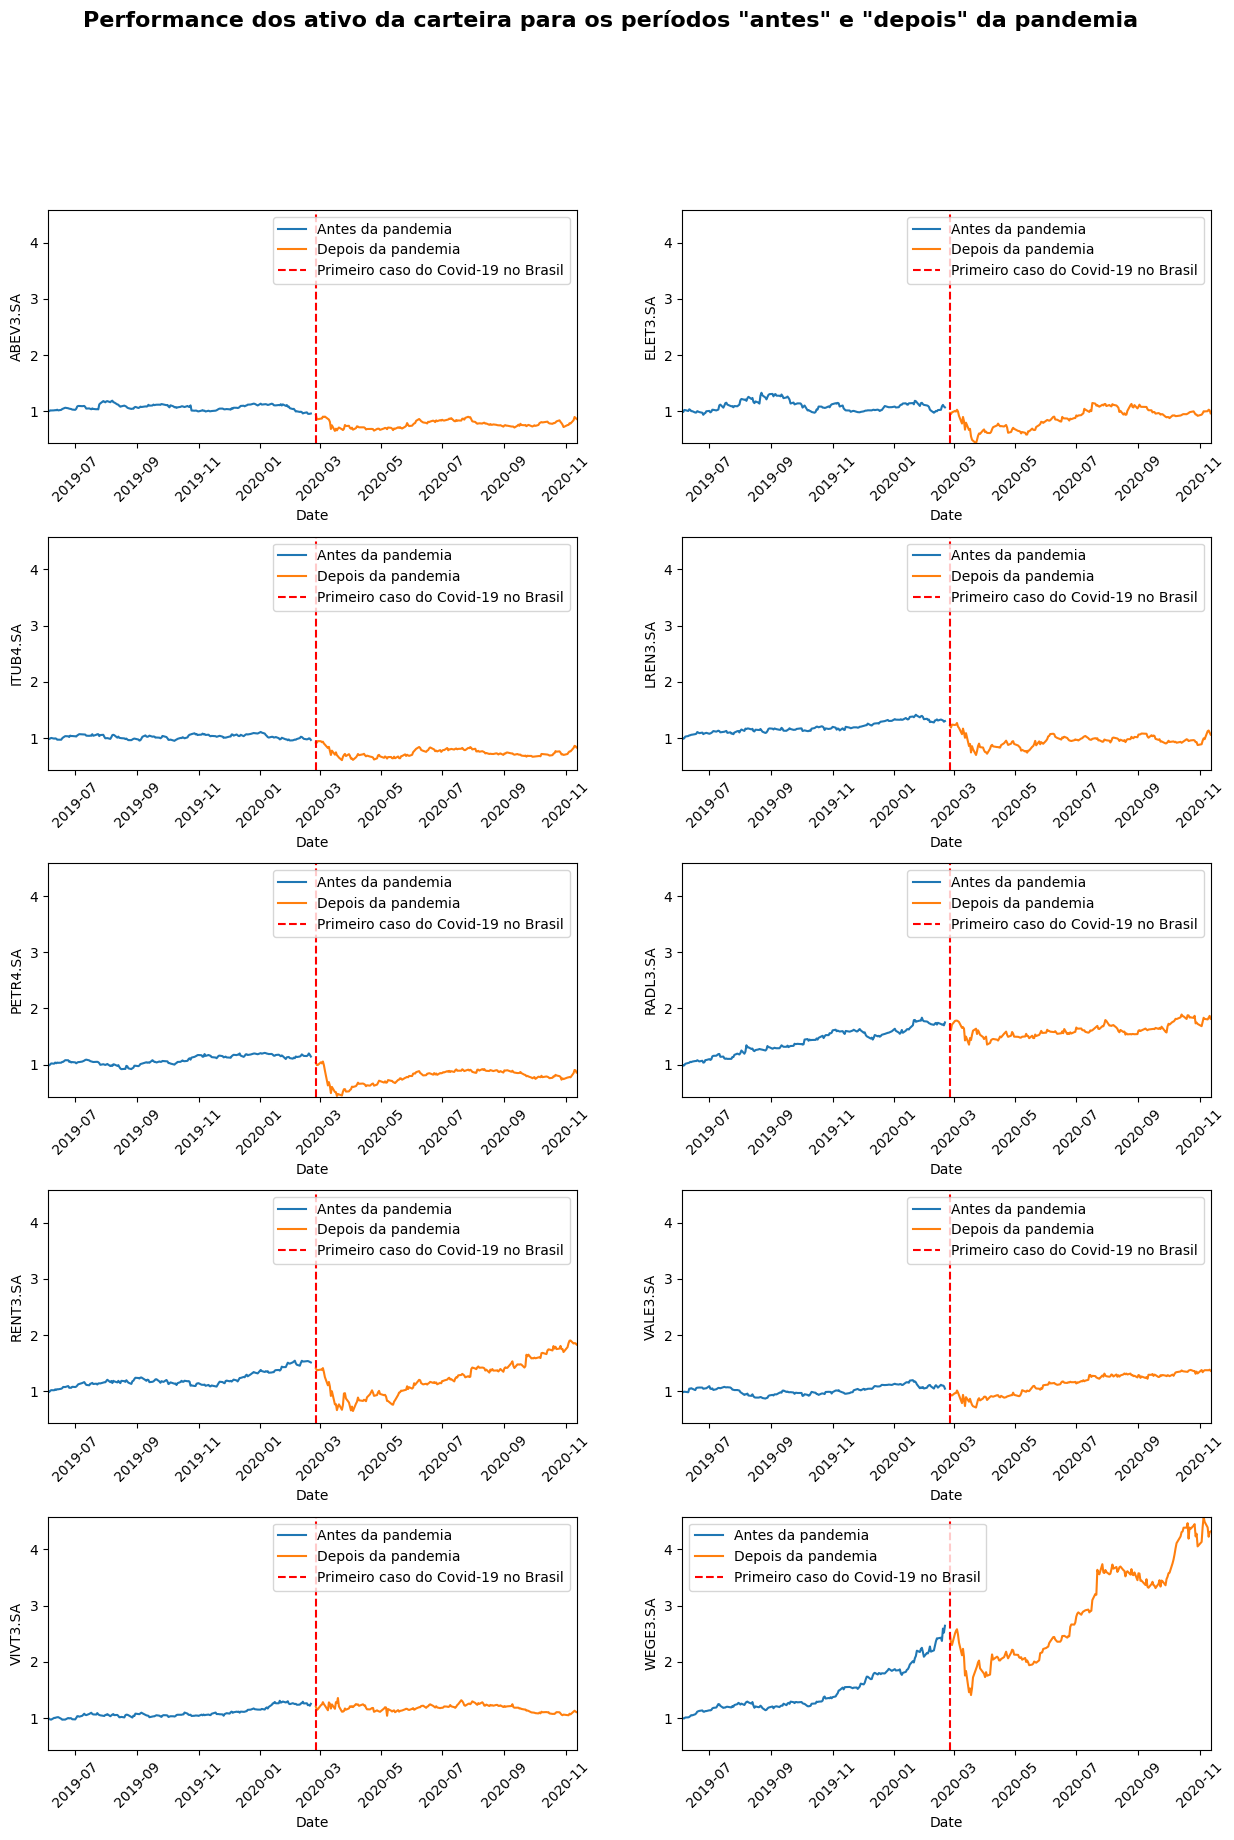

In [243]:
# Define o tamanho da matriz
nrows = 5
ncols = 2
ticker = np.array(df_precos_normalizados.columns).reshape(nrows, ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 20))

# Adiciona espaçamento entre os subplots
plt.subplots_adjust(hspace=0.4, wspace=0.2)

xlim_min = df_precos_normalizados.index.min()
xlim_max = df_precos_normalizados.index.max()

ylim_min = df_precos_normalizados.min().min()
ylim_max = df_precos_normalizados.max().max()

for i in range(nrows):
  for j in range(ncols):
    sns.lineplot(x=antes_pandemia.index, y=antes_pandemia[ticker[i,j]], label='Antes da pandemia', ax=axs[i,j])
    sns.lineplot(x=depois_pandemia.index, y=depois_pandemia[ticker[i,j]], label='Depois da pandemia', ax=axs[i,j])
    axs[i,j].axvline(x=pd.to_datetime('2020-02-26'), color='red', linestyle='--', label='Primeiro caso do Covid-19 no Brasil')
    #padronizando os dois eixos para todos os plots
    axs[i,j].set_xlim(xlim_min, xlim_max)
    axs[i,j].set_ylim(ylim_min, ylim_max)
    #axs[i,j].set_title(f"Preços de {ticker[i, j]} antes e depois da pandemia.")
    axs[i,j].legend()

    # Ajustar o eixo x para 45 graus
    axs[i,j].tick_params(axis='x', rotation=45)

# Adicionar título geral
fig.suptitle('Performance dos ativo da carteira para os períodos "antes" e "depois" da pandemia', fontsize=16, fontweight='bold')

# Exibir os gráficos
plt.show()

Em relação ao período anterior e posterior ao primeiro caso confirmado de COVID-19 no Brasil, podemos observar diferentes comportamentos entre as empresas analisadas. Nos gráficos acima, é perceptível que alguns ativos da carteira foram mais afetados do que outros:

- Um exemplo notável é a WEGE3, que experimentou um crescimento quase exponencial antes de sofrer uma queda abrupta após o primeiro caso de COVID-19 no Brasil, retornando aos patamares de quatro meses anteriores. No entanto, a empresa se recuperou em menos de cinco meses e retomou o ritmo de crescimento com um aumento na volatilidade.

- A RENT3 experimentou uma queda significativa nas primeiras semanas, porém rapidamente recuperou seu ritmo de crescimento.

- A ABEV3 e a ITUB4 apresentaram quedas suaves e, até o final do período observado, não conseguiram retornar aos níveis pré-pandemia.

- Já a ELET3, PETR4 e LREN3 sofreram quedas acentuadas e ainda não conseguiram se recuperar totalmente.

- Por outro lado, as empresas RADL3 e VALE3 demonstraram uma rápida recuperação, com um impacto relativamente fraco na data da pandemia.

- Enquanto isso, a VIVT3 manteve seus preços "lateralizados", sem nenhuma tendência estabelecida, tanto antes quanto depois da pandemia, evidenciando um aumento apenas na volatilidade.

##### 2.2.3.2 Risco e retorno dos ativos

Em investimentos, o risco de um ativo pode ser interpretado como o desvio padrão de seus retornos. Esse desvio padrão também é chamado de Volatilidade de um ativo.

**Calculando os retornos:**

In [244]:
retornos = df_precos_antes_depois.pct_change().dropna()
retornos.head()

,ABEV3.SA,ELET3.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,
2019-06-05,0.003511,-0.012570,-0.019353,-0.013588,-0.012141,-0.017788,-0.011818,-0.014655,-0.012686,-0.006787
2019-06-06,0.013296,0.037186,0.010405,0.009965,0.015642,0.006299,0.019933,0.008228,-0.013171,0.000000
2019-06-07,-0.001381,-0.002261,0.010653,0.029309,0.018702,0.027387,0.012928,-0.002825,-0.003255,0.015945
2019-06-10,0.002075,-0.015215,-0.012649,0.009304,-0.004320,0.015232,-0.001781,-0.006610,0.032005,0.002242
2019-06-11,0.004141,0.029915,0.004982,0.011173,0.019523,0.003751,0.014868,0.064005,0.000000,0.006711


**Qual o risco dos ativos desta carteira?**

A volatilidade indica quanto os retornos do ativo flutuam em relação à média. Uma maior volatilidade significa que o preço do ativo pode variar significativamente em um certo período de tempo, enquanto uma menor volatilidade indica que o preço do ativo é mais estável.

Abaixo podemos observar os ativos em ordem decrescente de risco.

In [245]:
# Calcular a volatilidade (desvio padrão) dos retornos
volatilidade = retornos.std().sort_values(ascending=False)

# Imprimir a volatilidade em termos percentuais
for stock, vol in volatilidade.items():
    print(f'{stock}: {vol * 100:.2f}%')

ELET3.SA: 4.14%
RENT3.SA: 4.04%
PETR4.SA: 3.66%
LREN3.SA: 3.40%
WEGE3.SA: 3.15%
VALE3.SA: 3.04%
ITUB4.SA: 2.65%
ABEV3.SA: 2.56%
RADL3.SA: 2.41%
VIVT3.SA: 2.35%


**O risco permaneceu o mesmo antes e depois da pandemia?**

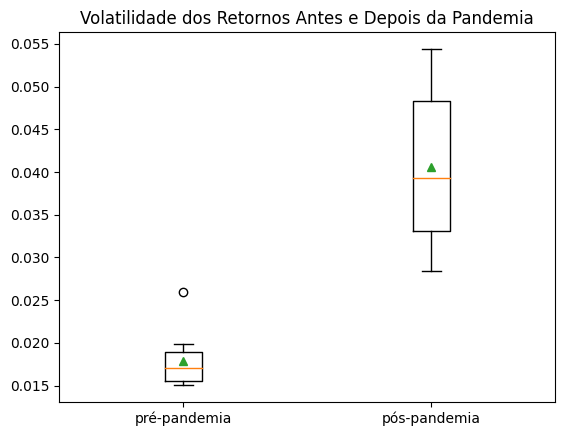

In [246]:
# Separando os retornos por período pré-pandemia e pós-pandemia:
retornos['Periodo'] = np.where(retornos.index < '2020-02-26', 'pré-pandemia', 'pós-pandemia')


# Calculando os riscos para os dois períodos
riscos_comparados = retornos.pivot_table(
    columns=retornos['Periodo'],
    values=retornos.columns.values[:-1],
    aggfunc='std')

plt.boxplot(riscos_comparados, showmeans=True, labels=['pré-pandemia','pós-pandemia'])

plt.title('Volatilidade dos Retornos Antes e Depois da Pandemia')

plt.show()


Visualmente, é evidente o aumento na volatilidade durante o período pós-pandemia. 

A pandemia trouxe incertezas econômicas globais, resultando em grandes oscilações nos preços das ações devido a fatores como *lockdowns*, mudanças na demanda do consumidor, perturbações nas cadeias de suprimentos, e políticas governamentais.

Para confirmar com rigor estatístico se a média do risco das ações após a pandemia é significativamente maior do que antes, podemos realizar um teste t pareado:

In [247]:
# Realizar o teste t pareado unicaudal (uma cauda)
# alternative='greater': a média da distribuição subjacente à primeira amostra é superior à média da distribuição subjacente à segunda amostra.
resultado_teste = ttest_rel(riscos_comparados['pós-pandemia'], riscos_comparados['pré-pandemia'], alternative='greater')

# Exibir o resultado do teste
print(f'Estatística t: {resultado_teste.statistic:.4f}')
print(f'Valor p: {resultado_teste.pvalue:.4f}')

# Verificar a significância
alpha = 0.01
if resultado_teste.pvalue < alpha:
    print(f'Rejeita-se a hipótese nula. \nA média do risco das ações após a pandemia é estatisticamente maior do que antes da pandemia com uma confiança de {1 - alpha:.0%}.')
else:
    print('Não há evidências para rejeitar a hipótese nula. A média do risco das ações após a pandemia não é estatisticamente maior do que antes da pandemia.')


Estatística t: 8.3010
Valor p: 0.0000
Rejeita-se a hipótese nula. 
A média do risco das ações após a pandemia é estatisticamente maior do que antes da pandemia com uma confiança de 99%.


Ativos com maior volatilidade são geralmente considerados de maior risco, pois apresentam uma maior variação nos retornos ao longo do tempo. No entanto, esses ativos também podem oferecer maiores retornos potenciais. Os investidores precisam equilibrar cuidadosamente o risco e o retorno esperado ao decidir em quais ativos investir. Uma maneira de visualizar esse equilíbrio é através de um gráfico de dispersão que mostra a relação entre risco e retorno para os dois períodos. Isso permite uma análise comparativa da relação entre volatilidade e retornos antes e depois da pandemia, fornecendo *insights* valiosos para a tomada de decisões de investimento.

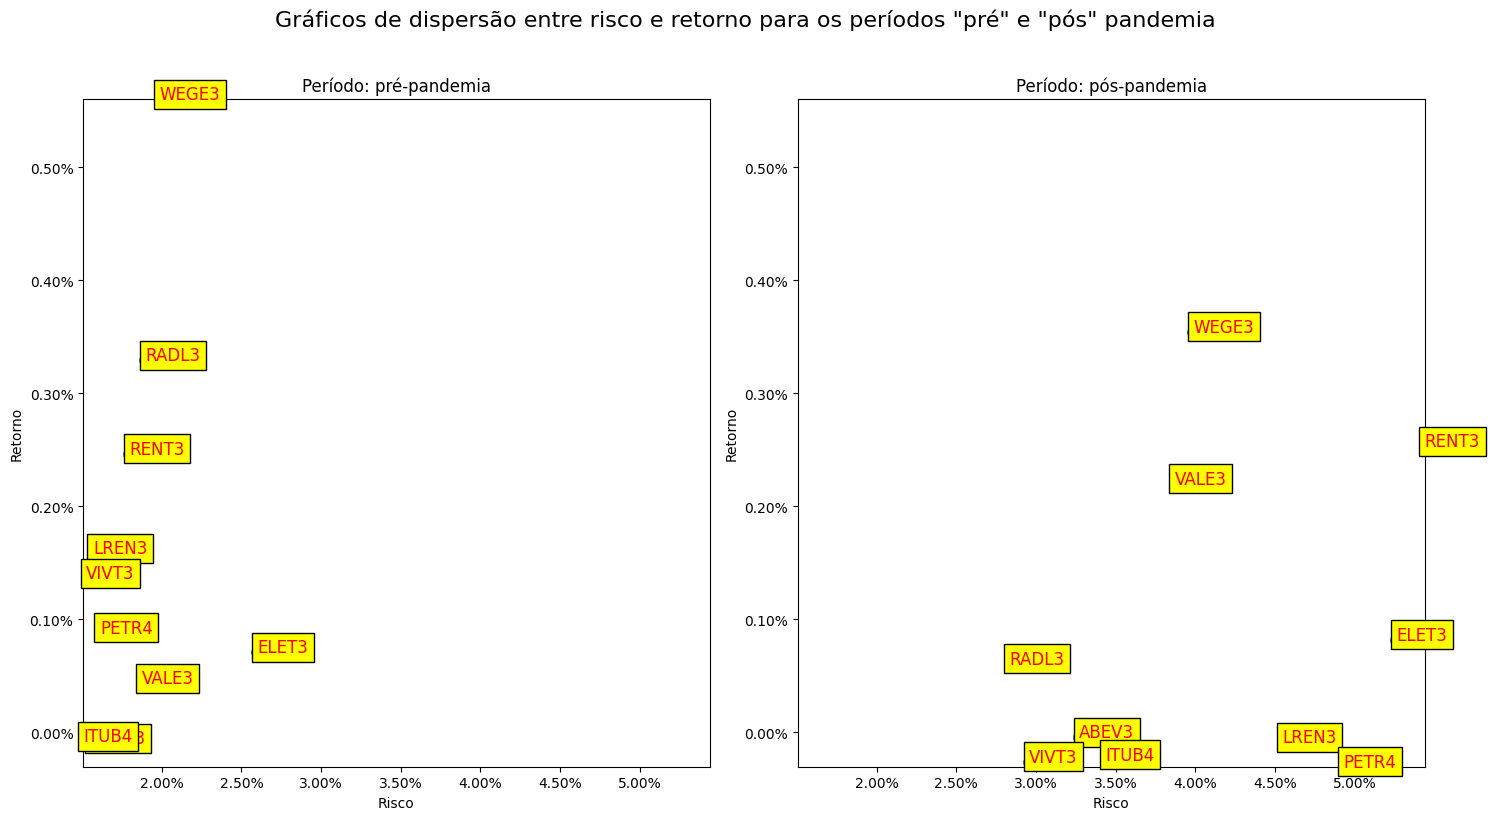

In [248]:
# Transforma a tabela de formato largo para formato longo
df_retornos_vertical = retornos.melt(id_vars=['Periodo'], var_name='Código', value_name='Retorno', ignore_index=False)

df_risco_retorno = df_retornos_vertical.groupby(['Código', 'Periodo'])['Retorno'].agg([('Risco', 'std'), ('Retorno', 'mean')]).reset_index().set_index('Código')



# Criar dois gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

xlim_min = df_risco_retorno.Risco.min()
xlim_max = df_risco_retorno.Risco.max()

ylim_min = df_risco_retorno.Retorno.min()
ylim_max = df_risco_retorno.Retorno.max()


# Iterar sobre os períodos "antes" e "depois"
for i, periodo in enumerate(df_risco_retorno['Periodo'].unique()):
    df_periodo = df_risco_retorno[df_risco_retorno['Periodo'] == periodo]

    # Gráfico de dispersão
    sns.scatterplot(data=df_periodo, x='Risco', y='Retorno', ax=axes[i], s=100)


    # Adicionar labels para cada ponto
    for index, row in df_periodo.iterrows():
        axes[i].text(x=row['Risco'], y=row['Retorno'], s=index[:-3],
                     fontdict=dict(color='red', size=12),
                     bbox=dict(facecolor='yellow'))

    # Adicionar título para cada gráfico
    axes[i].set_xlim(xlim_min, xlim_max)
    axes[i].set_ylim(ylim_min, ylim_max)
    axes[i].set_title(f'Período: {periodo}')

    # Formatar os eixos x e y para percentagem
    axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    

# Adicionar título geral
fig.suptitle('Gráficos de dispersão entre risco e retorno para os períodos "pré" e "pós" pandemia', y=1.02, fontsize=16)


# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

No gráfico, podemos observar que um aumento no risco nem sempre está diretamente correlacionado a um aumento no retorno. Durante períodos de incerteza, como a pandemia, é possível observar o risco aumentando, enquanto o retorno pode permanecer estável ou até mesmo diminuir.

##### 2.2.3.3 Correlação entre os ativos

**Os ativos estão correlacionados?**

Uma forma de diminuir o risco de uma carteira de investimentos é ter ativos que sejam pouco correlacionados entre si. Isso porque, quando um ativo perde, o outro ativo pode ganhar ou continuar constante. Se os ativos forem muito correlacionados, perde-se o efeito da "diversificação".

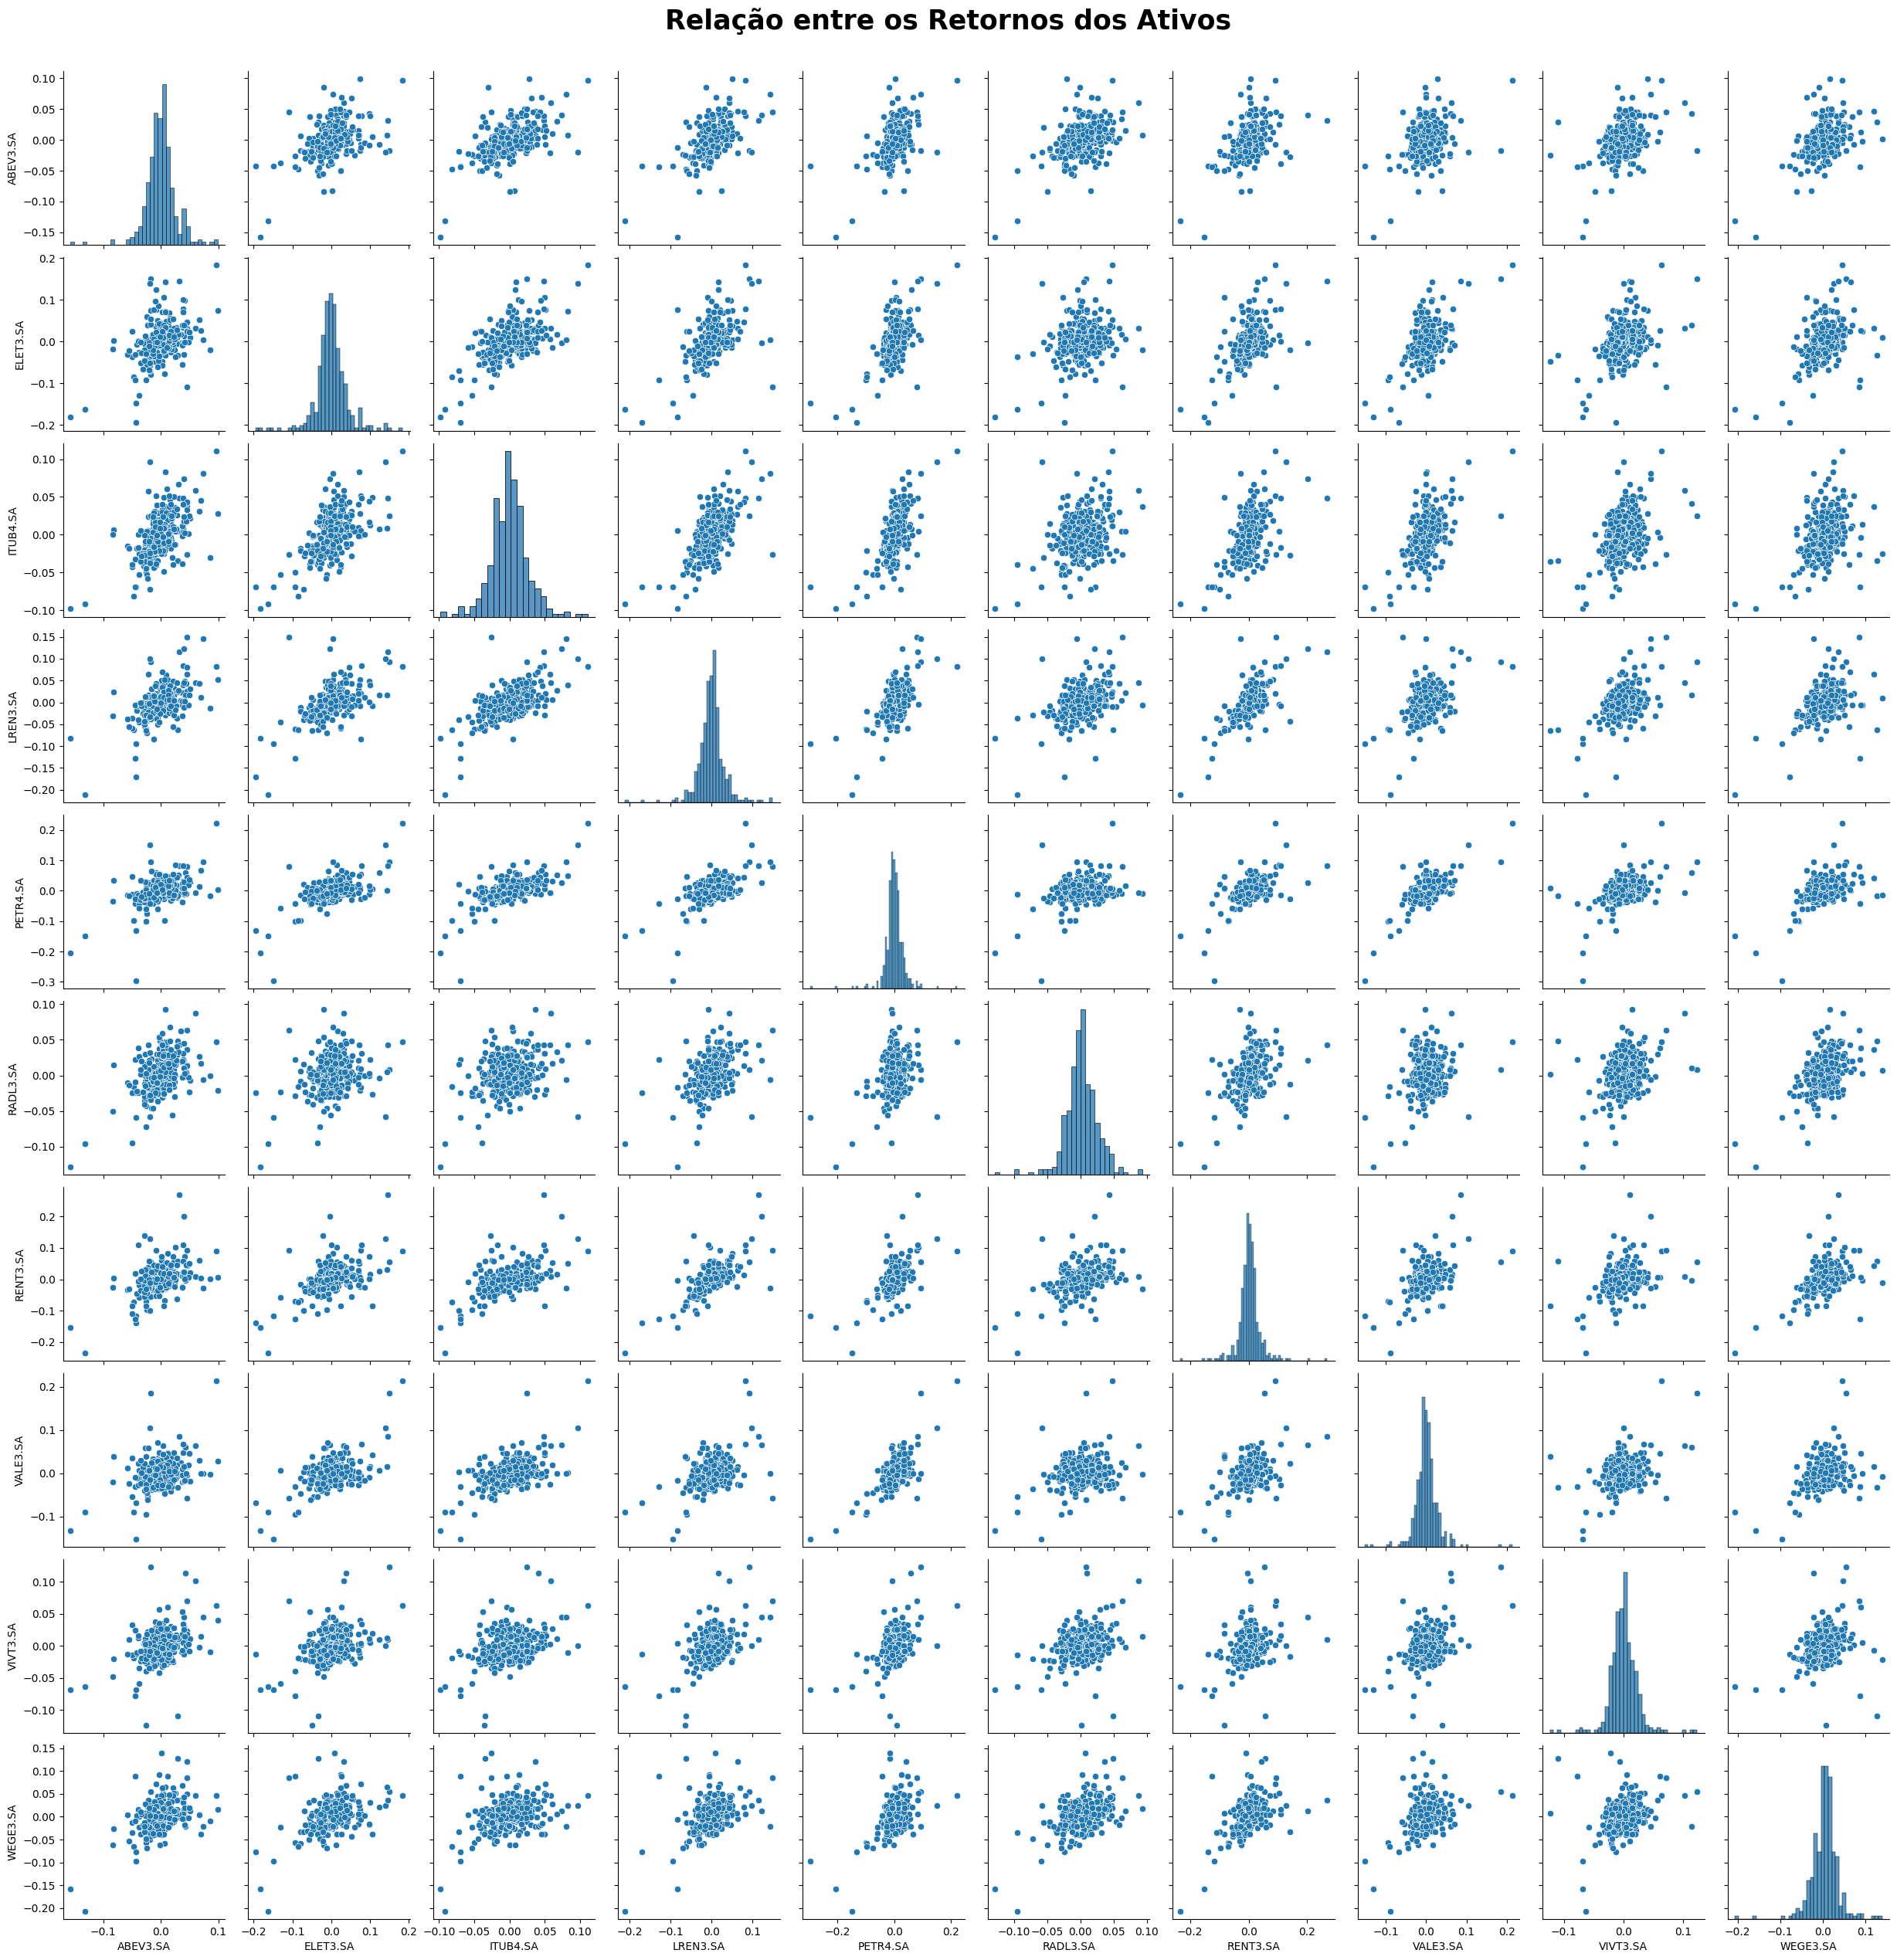

In [249]:
sns.pairplot(retornos)
plt.suptitle("Relação entre os Retornos dos Ativos", y=1.02, fontsize=25, fontweight='bold')
plt.show()

Graficamente, podemos observar uma correlação linear positiva para todos os ativos da carteira. Podemos quantificar essas correlações utilizando o coeficiente de correlação de Pearson:

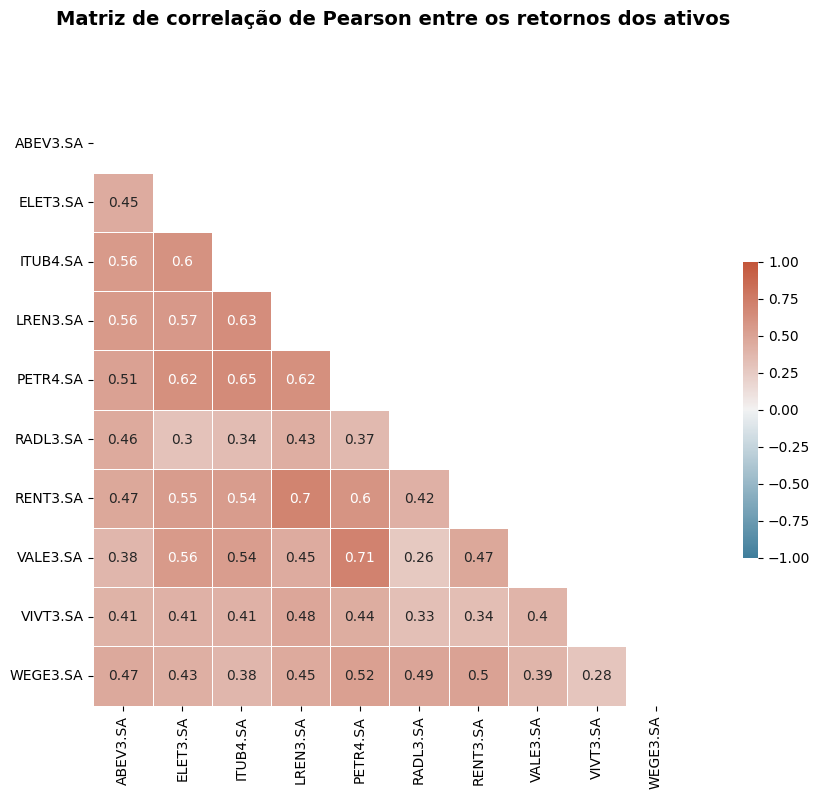

In [250]:
# Matriz de correlação de Pearson para cada par de ações
corr = retornos[retornos.columns[:-1]].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a figura matplotlib
f, ax = plt.subplots(figsize=(15, 8))

# Gere um mapa de cores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Define os limites da escala de cores
vmin, vmax = -1, 1

# Desenhe o mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.subplots_adjust(top=0.85)
plt.suptitle('Matriz de correlação de Pearson entre os retornos dos ativos',x=0.55, fontsize=14, fontweight='bold')
plt.show()

A carteira possui correlação positiva, variando entre fraca, moderada e forte. Destaca-se uma correlação forte entre VALE3 (Mineração) e PETR4 (Gás e Biocombustíveis), com um coeficiente de correlação de 0.71, e entre RENT3 (Diversos) e LREN3 (Comércio), com um coeficiente de correlação de 0.70.

**A correlação entre os ativos é igual antes e depois da pandemia?**

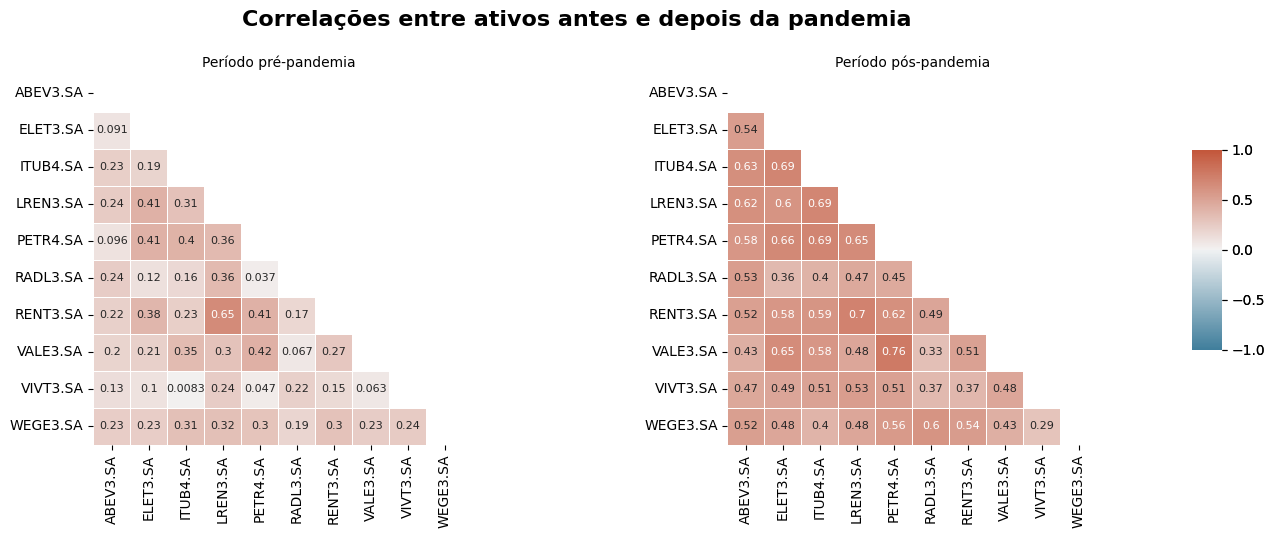

In [251]:
# Separando os períodos
antes_pandemia = retornos.query('Periodo == "pré-pandemia"')[retornos.columns[:-1]]
depois_pandemia = retornos.query('Periodo == "pós-pandemia"')[retornos.columns[:-1]]


# Função para gerar mapa de calor
def plot_heatmap(corr, ax, title):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    vmin, vmax = -1, 1
    cbar_ax = ax.figure.add_axes([.91, .3, .02, .4])  # Define a posição da barra de cores
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
                annot_kws={"size": 8}, cbar_ax=cbar_ax)  # Usa a mesma barra de cores
    ax.set_title(title, fontsize=10)  # Reduza o tamanho do título

# Calcula as correlações para ambos os períodos
corr_antes = antes_pandemia.corr()
corr_depois = depois_pandemia.corr()

# Cria um único subplot para ambos os mapas de calor
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gera mapas de calor para antes e depois da pandemia
plot_heatmap(corr_antes, ax[0], 'Período pré-pandemia')
plot_heatmap(corr_depois, ax[1], 'Período pós-pandemia')

# Adiciona uma legenda geral
fig.subplots_adjust(top=0.85)
fig.suptitle('Correlações entre ativos antes e depois da pandemia', fontsize=16, fontweight='bold')

# Mostra o gráfico
plt.show()


No gráfico acima, há uma distinção notável nas correlações entre os mesmos ativos antes e depois da pandemia. No período pré-pandemia, a carteira exibe uma maior "diversificação", com poucas associações significativas, sugerindo que os preços de cada empresa não se movem em sincronia com os demais ativos. Por outro lado, no período pós-pandemia, as correlações se tornam mais evidentes, possivelmente devido às quedas simultâneas dos ativos ocorridas na primeira semana da disseminação do COVID-19 no Brasil.

## 3. Preparação dos Dados

### 3.1 Limpeza e Formatação dos dados

Para esta etapa, vamos definir os seguintes parâmetros:

- Saldo de valor investido na carteira pelo investidor: R\$ 1.000.000,00 (um milhão de reais).

- Horizonte de tempo para o cálculo do *VaR*: Últimos 180 dias.

In [252]:
retornos_180dias = retornos.drop('Periodo', axis=1).iloc[-180:].copy()

#### 3.1.1 Distribuição dos retornos

Uma das premissas para o uso do *VaR* é que os retornos dos ativos seguem uma distribuição Normal.
 
Podemos verificar esta hipótese:

In [253]:
retorno_carteira = retornos_180dias.mean(1)

# Realização de Teste de Hipóteses para avaliar Normalidade

normalidade = shapiro(retorno_carteira)
print('Carteira Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))


for ticker in retornos_180dias:
    normalidade = shapiro(retornos_180dias[ticker])
    print(ticker, 'Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Carteira Estatística=0.898, p-valor=0.000

ABEV3.SA Estatística=0.947, p-valor=0.000

ELET3.SA Estatística=0.928, p-valor=0.000

ITUB4.SA Estatística=0.993, p-valor=0.508

LREN3.SA Estatística=0.937, p-valor=0.000

PETR4.SA Estatística=0.836, p-valor=0.000

RADL3.SA Estatística=0.951, p-valor=0.000

RENT3.SA Estatística=0.905, p-valor=0.000

VALE3.SA Estatística=0.856, p-valor=0.000

VIVT3.SA Estatística=0.895, p-valor=0.000

WEGE3.SA Estatística=0.911, p-valor=0.000



Apenas os dados do ativo ITUB4 apresentaram um p-valor maior que 0.05, sugerindo uma distribuição aproximadamente normal. Por outro lado, para os demais ativos, os valores p foram menores que 0.05, indicando uma rejeição da hipótese nula e a ausência de uma distribuição normal.

#### 3.1.2 Risco da carteira

Comparando o risco de cada ativo (desvio padrão dos retornos) com o risco da carteira:

In [254]:
# Calcular a volatilidade (desvio padrão) dos retornos dos ultimos 180 dias
volatilidade = retornos_180dias.std().sort_values(ascending=False)

print('Volatilidade dos ativos em 180 dias:')
# Imprimir a volatilidade em termos percentuais
for codigo, vol in volatilidade.items():
    print(f'{codigo}: {vol * 100:.2f}%')

Volatilidade dos ativos em 180 dias:
RENT3.SA: 5.44%
ELET3.SA: 5.26%
PETR4.SA: 4.93%
LREN3.SA: 4.55%
WEGE3.SA: 3.99%
VALE3.SA: 3.87%
ITUB4.SA: 3.44%
ABEV3.SA: 3.27%
VIVT3.SA: 2.96%
RADL3.SA: 2.84%


In [255]:
print(f"Volatilidade da carteira em 180 dias (pesos iguais): {retornos_180dias.mean(1).std() * 100:.2f}%")

print(f"Volatilidade da carteira em 180 dias (pesos ponderados): {(retornos_180dias[Carteira['Código'].values] @ Carteira['Peso'].values).std() * 100:.2f}%")

Volatilidade da carteira em 180 dias (pesos iguais): 3.12%
Volatilidade da carteira em 180 dias (pesos ponderados): 3.37%


Como podemos notar, a volatilidade da carteira com pesos iguais (3,12%) é significativamente menor do que a maioria das volatilidades individuais dos ativos. Essa redução do risco da carteira em relação aos riscos individuais se deve à diversificação, onde a combinação de diferentes ativos na carteira ajuda a mitigar o risco geral. Quando os preços dos ativos não se movem em sincronia, um ativo pode compensar a perda de outro, resultando em uma menor volatilidade geral da carteira.

Por outro lado, a carteira com pesos ponderados possui uma volatilidade um pouco maior (3,37%), mostrando que este risco pode ser controlado ajustando os pesos dos ativos na carteira.

#### 3.1.3 Cálculo do *VaR* dos ativos

A metodologia do *Value-at-Risk* (*VaR*) pode ser definida como a estimativa máxima de perda de um portfólio dentro de um intervalo de confiança específico e um período de tempo determinado, sob condições normais de mercado. Em nosso caso, consideramos um período de 180 dias e um nível de confiança de 95%.

**Calculando o *VaR*<sub>95%</sub> de cada ativo considerando o quanto o investidor tem em sua carteira:**

In [256]:
# Calcula o patrimônio de cada ativo na carteira
Portfolio = Carteira[['Código', 'Peso']].copy().set_index('Código')
Portfolio['Patrimonio'] = round(Portfolio['Peso'] * 1_000_000, 2)

# Define uma função lambda para calcular o VaR (Value at Risk) no nível de 5%
VaR = lambda returns: np.percentile(returns, 5)

Portfolio['VaR'] = retornos_180dias.apply(VaR)

# Calcula o VaR em termos monetários para cada ativo
Portfolio['VaR(R$)'] = round(Portfolio['Patrimonio'] * Portfolio['VaR'],2)

Portfolio

,Peso,Patrimonio,VaR,VaR(R$)
Código,,,,
VALE3.SA,0.317285,317284.72,-0.045248,-14356.57
PETR4.SA,0.181011,181010.69,-0.059624,-10792.60
ITUB4.SA,0.166725,166724.65,-0.052865,-8813.97
ELET3.SA,0.089125,89125.44,-0.078586,-7004.04
ABEV3.SA,0.062038,62037.62,-0.044361,-2752.07
RENT3.SA,0.054199,54198.85,-0.083662,-4534.40
WEGE3.SA,0.053712,53711.82,-0.056211,-3019.18
RADL3.SA,0.037431,37431.29,-0.040960,-1533.20
VIVT3.SA,0.022171,22171.20,-0.039855,-883.62


O *VaR*<sub>95%</sub> da VALE3, por exemplo, calculado como o percentil de 5% da distribuição dos retornos diários, indica que há uma probabilidade de 5% de que em qualquer dia de negociação, a perda será de pelo menos R\$ 14.356,57. Em outras palavras, espera-se que, em 5% dos dias de negociação, as perdas do ativo sejam de pelo menos R\$ 14.356,57.

**Calculando o *VaR*<sub>95%</sub> da carteira do investidor:**

In [257]:
retornos_carteira_180dias = retornos_180dias[Carteira['Código'].values] @ Carteira['Peso'].values
VaR_carteira = np.percentile(retornos_carteira_180dias, 5)
print(f"VaR da carteira em 180 dias: {VaR_carteira:.02%}")

VaR da carteira em 180 dias: -4.40%


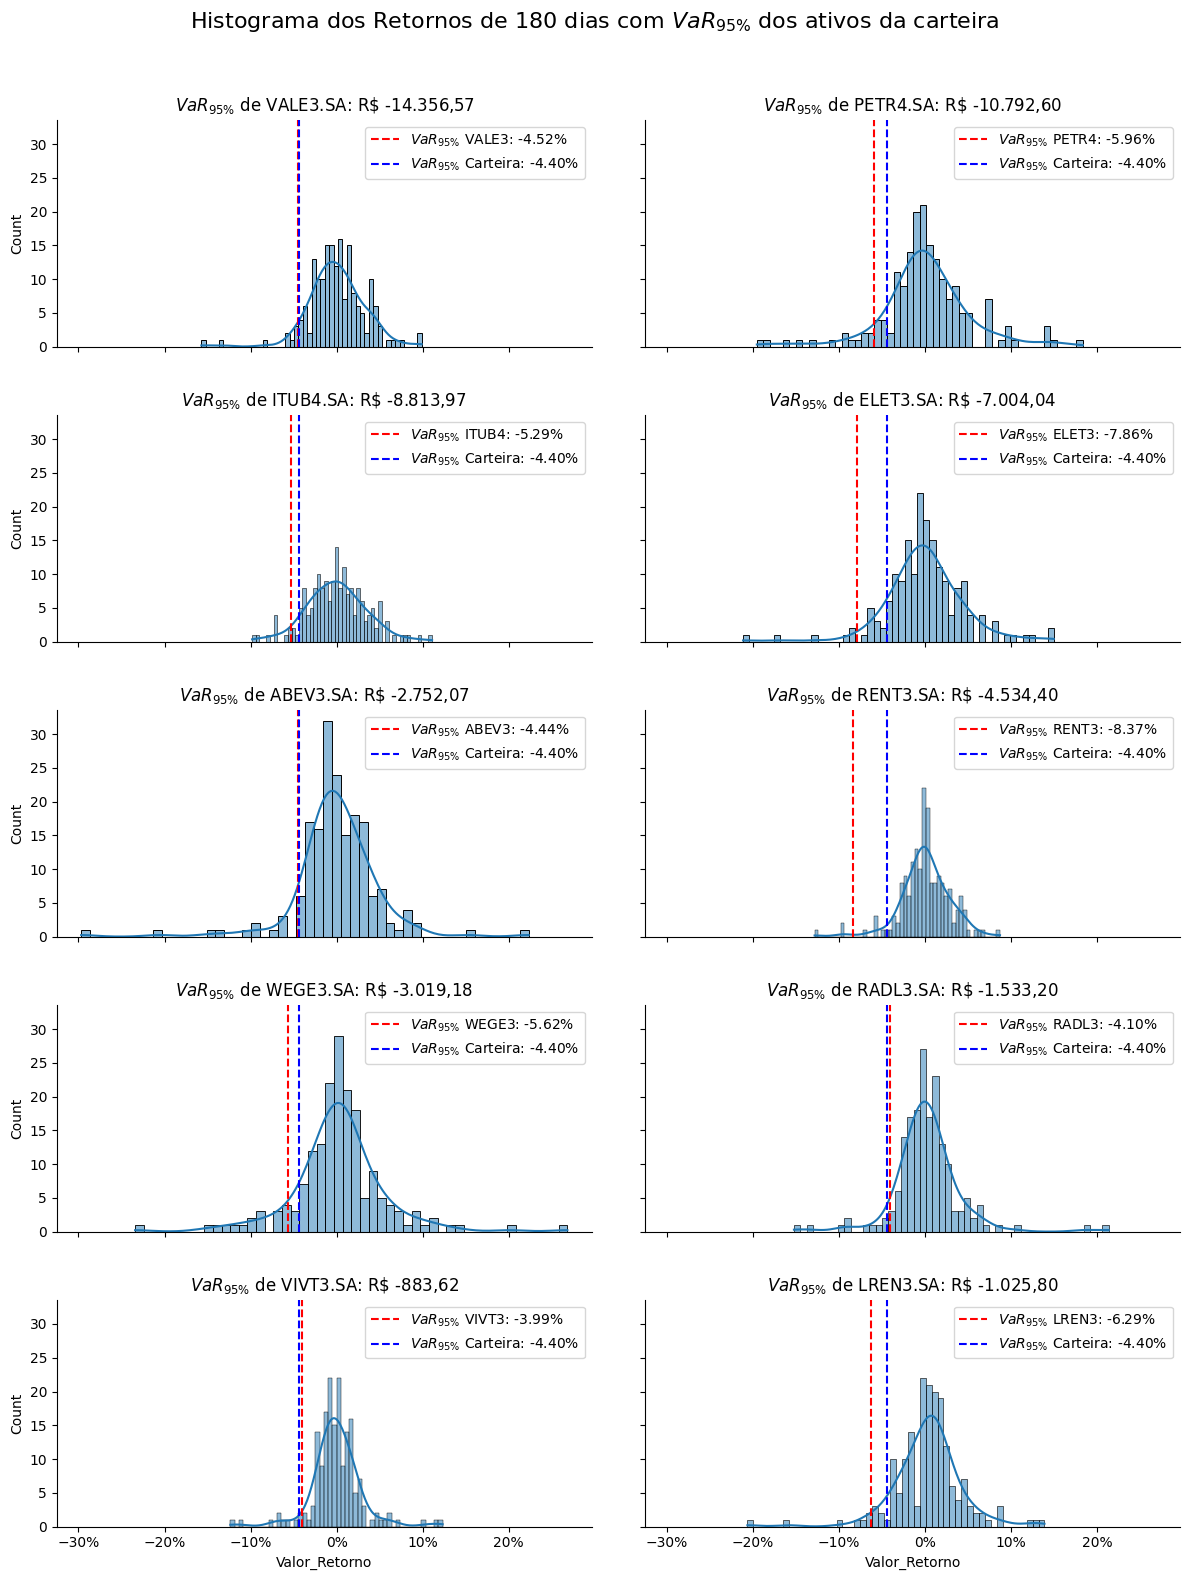

In [258]:
df_melted = retornos_180dias.melt(var_name='Código', value_name='Valor_Retorno')

template = '{VaR_95} de {col_name}: R\$ {var}' 

# Plotar histogramas separados para cada variável
g = sns.FacetGrid(df_melted, col='Código', col_wrap=2, aspect=2)
g.map(sns.histplot, 'Valor_Retorno', bins=50, kde=True)

# Adicionar linhas verticais para VaR em cada gráfico
for ax, codigo in zip(g.axes.flat, Portfolio.index):
    var_perc = Portfolio.loc[codigo]['VaR']
    var_valor = Portfolio.loc[codigo]['VaR(R$)']
    ax.axvline(var_perc, color='red', linestyle='--', label=r'$VaR_{95\%}$ ' + f'{codigo[:-3]}: {var_perc:.02%}')
    ax.axvline(VaR_carteira, color='blue', linestyle='--', label=r'$VaR_{95\%}$ ' + f'Carteira: {VaR_carteira:.02%}')
    ax.set_title(template.format(VaR_95 = r'$VaR_{95\%}$', col_name=codigo, var=valor(var_valor)))
    ax.legend()
    # Formatar os eixos x para percentagem
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Adicionar título geral
g.figure.suptitle(r'Histograma dos Retornos de 180 dias com $VaR_{95\%}$ dos ativos da carteira', y=1.05, fontsize=16)

# Ajustar o espaço entre os subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.show()


Assim como a volatilidade, o *VaR*<sub>95%</sub> da carteira também diminui com a diversificação e pode ser controlado atribuindo pesos diferentes a cada ativo. A carteira apresentou um *VaR*<sub>95%</sub> de -4,40%, enquanto o ativo de maior risco, RENT3, apresentou um *VaR*<sub>95%</sub> de -8,37%, seguido por ELET3, com um *VaR*<sub>95%</sub> de -7,86%.

## 4. Desenvolvimento do modelo de *VaR*

Para calcular o *VaR* pelo método histórico em Python, definiremos uma função com os seguintes passos:
- Selecionar o período histórico dos preços dos ativos.
- Calcular os retornos diários da carteira ponderada pelos pesos dos ativos.
- Consultar o percentil da distribuição dos retornos históricos para identificar o *VaR*<sub>95%</sub> do período especificado.

In [259]:
def calcula_VaR_carteira(df, start, end, ativos, pesos, valor_investido):

    ativos = ativos.copy()
    pesos = pesos.copy()

    # Seleciona o período histórico de preços definido por 'start' e 'end'
    horizonte_tempo = df.loc[start: end].copy()

    # Remove duplicatas dos dados históricos
    horizonte_tempo.drop_duplicates(inplace=True)

    # Calcula os retornos diários da carteira ponderada pelos pesos dos ativos
    retornos_diarios = horizonte_tempo.pct_change().dropna()
    # Calculando o valor investido em cada ativo
    patrimonio = [peso * valor_investido for peso in pesos]
    retornos_carteira = retornos_diarios[ativos] @ patrimonio

    # Calcula o VaR realizado do periodo
    VaR = np.percentile(retornos_carteira, 5)

    return VaR, retornos_carteira

### 4.1 *Backtesting* do Modelo *VaR*<sub>95%</sub>

O *backtesting* é uma técnica fundamental para avaliar a precisão do *VaR*. Ele envolve a comparação dos valores de *VaR* previstos com os retornos reais observados.

Nesta etapa, testaremos o *VaR*<sub>95%</sub> da carteira do investidor para o ano de 2019, utilizando dados históricos do período de 01/01/2019 a 30/06/2019. Esse cálculo será utilizado para avaliar se a perda esperada estimada pelo *VaR*<sub>95%</sub> se concretizou no período de 01/07/2019 a 31/12/2019:

In [260]:
valor_investido = 1_000_000
ativos = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'ELET3.SA', 'ABEV3.SA', 'RENT3.SA', 'WEGE3.SA', 'RADL3.SA', 'VIVT3.SA', 'LREN3.SA']
pesos = [0.31728472, 0.18101069, 0.16672465, 0.08912544, 0.06203762, 0.05419885, 0.05371182, 0.03743129, 0.0221712 , 0.01630372]

# VaR da carteira do investidor utilizando como período histórico 01/01/2019 até 30/06/2019
start='2019-01-01'
end='2019-06-30'

VaR_historico, retorno_historico = calcula_VaR_carteira(df_precos, start, end, ativos, pesos, valor_investido)
print(f'VaR da carteira do investidor 01/01/2019 até 30/06/2019: R$ {valor(VaR_historico)}')

# VaR da carteira do investidor utilizando como período histórico 01/07/2019 até 31/12/2019
start='2019-07-01'
end='2019-12-31'

VaR_realizado, retorno_realizado = calcula_VaR_carteira(df_precos, start, end, ativos, pesos, valor_investido)
print(f'VaR da carteira do investidor 01/07/2019 até 31/12/2019: R$ {valor(VaR_realizado)}')

VaR da carteira do investidor 01/01/2019 até 30/06/2019: R$ -21.246,06
VaR da carteira do investidor 01/07/2019 até 31/12/2019: R$ -19.041,90


Agora, verificaremos quantos dias a perda na carteira permaneceu dentro do limite planejado pelo *VaR*:

Previsto: Espera-se que em 5% dos dias do período (6 dias) a perda seja maior ou igual a R$ -21.246,06.
Realizado: Em 3 dias do período a perda foi maior ou igual ao VaR previsto.


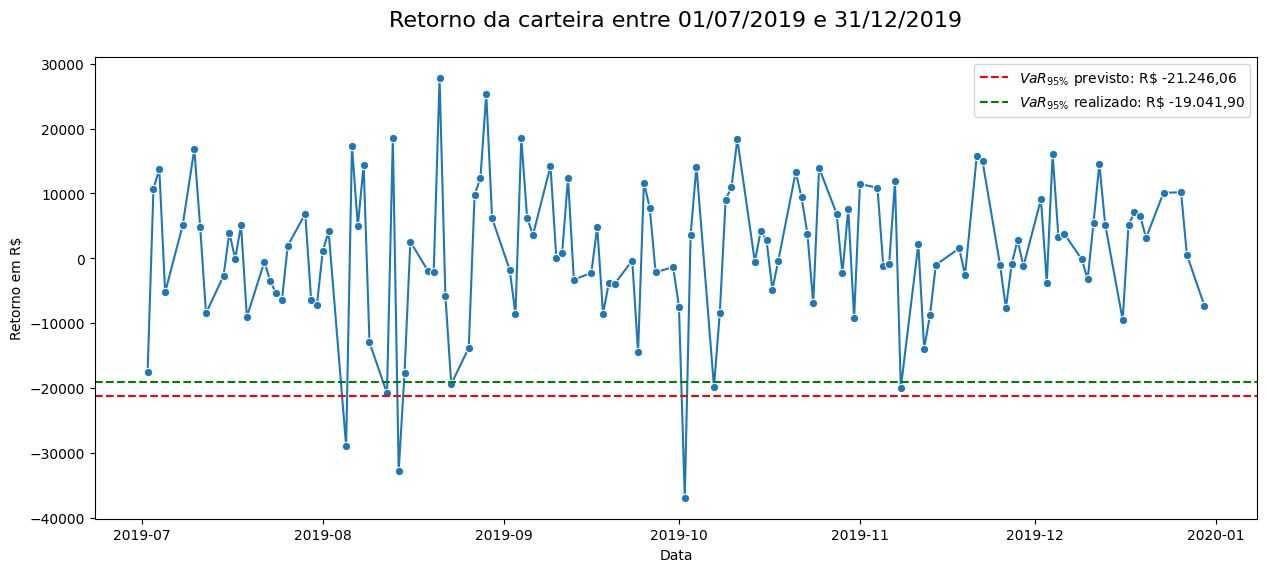

In [261]:
# Calcula os 5% dos dias do periodo
dias_esperado = round(retorno_realizado.count() * 0.05)

# Função lambda para contar dias com perda maior ou igual ao VaR previsto
conta_dias_perda = lambda x: 0 if x >= VaR_historico else 1
s = retorno_realizado.apply(conta_dias_perda)
dias_perda_realizado = retorno_realizado.apply(conta_dias_perda).sum()


print(f'Previsto: Espera-se que em 5% dos dias do período ({dias_esperado} dias) a perda seja maior ou igual a R$ {valor(VaR_historico)}.')
print(f'Realizado: Em {dias_perda_realizado} dias do período a perda foi maior ou igual ao VaR previsto.')


# Visualizando os retornos
plt.figure(figsize=(15, 6))
sns.lineplot(retorno_realizado, marker='o')
plt.axhline(VaR_historico, color='red', linestyle='--', label=r'$VaR_{95\%}$ previsto: '+ f'R\$ {valor(VaR_historico)}')
plt.axhline(VaR_realizado, color='green', linestyle='--', label=r'$VaR_{95\%}$ realizado: '+ f'R\$ {valor(VaR_realizado)}')
plt.legend()

plt.title('Retorno da carteira entre 01/07/2019 e 31/12/2019', y=1.05, fontsize=16)

plt.ylabel('Retorno em R$')
plt.xlabel('Data')

plt.show()


Como observado, o *VaR*<sub>95%</sub> previsto para o segundo semestre de 2019 subestimou o risco, uma vez que a carteira experimentou perdas significativas em apenas 3 dos 6 dias estimados pelo modelo, com um *VaR*<sub>95%</sub> realizado para o período de R\$ -19.041,90 contra R\$ -21.246,06 previsto. 

Embora este cenário seja considerado favorável, é importante destacar que resultados semelhantes podem não ser consistentes. Portanto, na próxima etapa, realizaremos o *backtest* em vários períodos para avaliar sua consistência.

### 4.2 *Backtesting* do Modelo *VaR*<sub>95%</sub> em Séries Semestrais

Para avaliar a eficácia do modelo de *VaR*<sub>95%</sub> em séries semestrais, vamos realizar um *backtest* abrangendo o período de 02/01/2007 a 27/06/2024. O objetivo é verificar a frequência com que os retornos ultrapassam os limites estabelecidos pelo *VaR* e avaliar a consistência do modelo.

#### 4.2.1 Criando a base com *VaR*<sub>95%</sub> Semestral

In [262]:
# Definindo uma função para calcular os retornos periódicos da carteira
def calcula_retornos_ponderados(retorno_geral, ativos, pesos, freq='M'):
    # Inicializa uma lista para armazenar os dados de retornos ponderados
    dados_retornos = []

    # Itera sobre os dados agrupados por período
    for periodo, dados_periodo in retorno_geral.resample(freq):
        # Calcula os retornos percentuais por periodo e remove quaisquer valores nulos
        dados_periodo_retornos = dados_periodo.pct_change().dropna()

        # Calcula o retorno ponderado da carteira
        dados_periodo_retornos['Retorno ponderado'] = dados_periodo_retornos[ativos] @ pesos

        # Mantém apenas o retorno ponderado na série de dados do periodo
        dados_periodo_retornos = dados_periodo_retornos[['Retorno ponderado']]
        
        # Adiciona os dados de retorno ponderado à lista de retornos
        dados_retornos.append((periodo, dados_periodo_retornos))

    return dados_retornos



# Definindo uma função para calcular o VaR dos retornos periódicos da carteira
def calcula_VaR(dados_retornos):
    # Inicializa uma lista para armazenar os dados de VaR
    dados_linhas = []

    # Define uma função lambda para calcular o VaR (Value at Risk) no nível de 5%
    VaR = lambda returns: np.percentile(returns, 5)

    # Itera sobre os dados de retornos ponderados
    for periodo, dados_periodo in dados_retornos:
        # Aplica a função VaR aos dados do período e obtém o VaR para esse período
        var_periodo = VaR(dados_periodo['Retorno ponderado'])

        dias_observados = dados_periodo['Retorno ponderado'].count()

        # Cria um dicionário para representar os dados deste período, incluindo o VaR calculado
        dados_VaR = {'Período': periodo,
                     'Qtd Dias': dias_observados,
                     'VaR': var_periodo}

        # Adiciona o dicionário de dados à lista de linhas de VaR
        dados_linhas.append(dados_VaR)

    # Converte a lista de dicionários de VaR em um DataFrame
    df = pd.DataFrame(dados_linhas)
    df['VaR Realizado'] = df['VaR'] * 1_000_000  # Converte o VaR para R$

    # Define 'Período' como o índice do DataFrame
    df.set_index('Período', inplace=True)

    return df

Calculando o *VaR*<sub>95%</sub> com base nos retornos ponderados dos ativos da carteira:

In [263]:
# Copiar o DataFrame de preços originais para evitar alterações no DataFrame original
retorno_geral = df_precos.copy()

# Remover quaisquer duplicatas no DataFrame de preços
retorno_geral.drop_duplicates(inplace=True)

# Calcular os retornos ponderados com base nos ativos e pesos fornecidos,
# e utilizando uma frequência semestral ('6MS')
retorno_ponderado = calcula_retornos_ponderados(retorno_geral, ativos, pesos, '6MS')

# Calcular o VaR com base nos retornos ponderados
df = calcula_VaR(retorno_ponderado)

#### 4.2.2 Diagnóstico do Modelo

##### 4.2.2.1 Estatística Descritiva da Base Semestral

In [264]:
df['Qtd Dias'].describe()

count     35.000000
mean     122.542857
std        1.686327
min      120.000000
25%      121.000000
50%      122.000000
75%      124.000000
max      126.000000
Name: Qtd Dias, dtype: float64

Os dias do período semestral estão bem distribuídos, com um desvio padrão de 1,686, variando em torno de uma média de 122 dias. A uniformidade dos períodos assegura que as variações observadas nos resultados não sejam influenciadas por discrepâncias temporais, mas sim pelas características dos dados e dos métodos de estimativa utilizados.

In [265]:
df['VaR Realizado'].describe()

count       35.000000
mean    -25458.559254
std      10723.820427
min     -66649.150638
25%     -26988.676003
50%     -22352.783724
75%     -19903.550161
max     -12108.141465
Name: VaR Realizado, dtype: float64

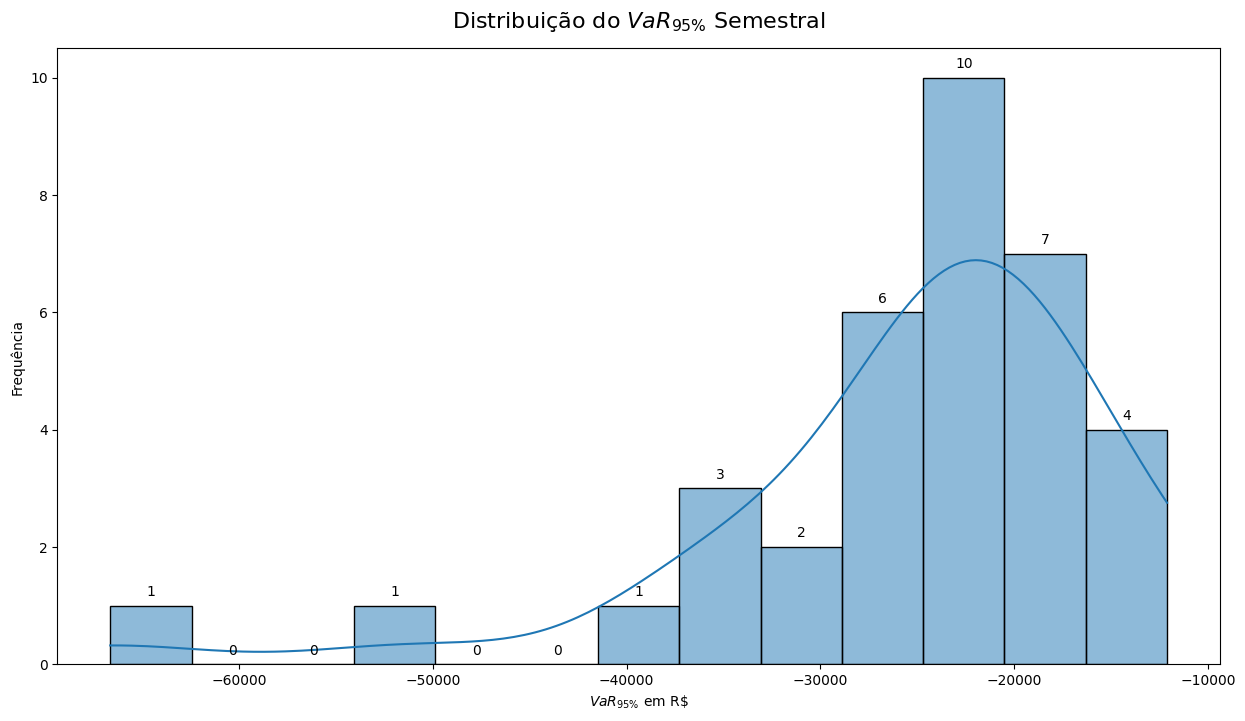

In [266]:
# distribuição do VaR Realizado
plt.figure(figsize=(15, 8))
histplot = sns.histplot(df['VaR Realizado'], kde=True)

# Adicionando as frequências no topo das barras
for patch in histplot.patches:
    height = patch.get_height()
    histplot.annotate(f'{height:.0f}', 
                      xy=(patch.get_x() + patch.get_width() / 2, height), 
                      xytext=(0, 5), 
                      textcoords='offset points', 
                      ha='center', 
                      va='bottom')

plt.title(r'Distribuição do $VaR_{95\%}$ Semestral', y=1.02, fontsize=16)
plt.xlabel(r'$VaR_{95\%}$ em R\$')
plt.ylabel('Frequência')
plt.show()

Podemos observar valores extremos no VaR Realizado, frequentemente associados a períodos de crise. Essas discrepâncias, como no caso em que a perda média é de R\$ 25.458,56, mas o VaR Realizado no período foi de R\$ 66.649,15, podem ser motivo de preocupação para investidores.

##### 4.2.2.2 Identificação de "Cisnes Negros" na Base

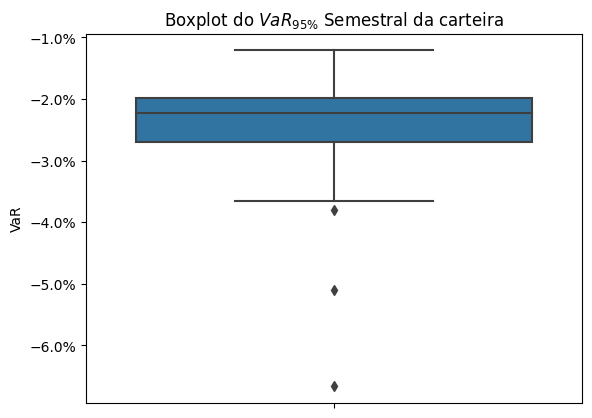

In [267]:
ax = sns.boxplot(y=df['VaR'])

plt.title(r'Boxplot do $VaR_{95\%}$ Semestral da carteira')
# Formatar os eixos x para percentagem
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('VaR')

plt.show()

Para detectar os "Cisnes Negros" na série temporal do VaR Realizado, podemos utilizar métodos estatísticos para detecção de *outliers* como o método do desvio interquartil (IQR). O processo consiste em calcular o primeiro quartil (Q1) e o terceiro quartil (Q3) da distribuição dos dados e, em seguida, definir um intervalo interquartil (IQR) como a diferença entre Q3 e Q1. Qualquer valor fora de 1.5 vezes o IQR acima do terceiro quartil ou abaixo do primeiro quartil é considerado um *outlier*.

In [268]:
# Detectando outliers no VaR Realizado usando o método do desvio interquartil
Q1 = df['VaR Realizado'].quantile(0.25)
Q3 = df['VaR Realizado'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['VaR Realizado'] < lower_bound) | (df['VaR Realizado'] > upper_bound)]

print(f'Frequência de "Cisnes Negros" na carteira: {len(outliers)/len(df):.2%}')
outliers

Frequência de "Cisnes Negros" na carteira: 8.57%


,Qtd Dias,VaR,VaR Realizado
Período,,,
2008-07-01,126,-0.066649,-66649.150638
2016-01-01,122,-0.038039,-38039.093933
2020-01-01,122,-0.051083,-51082.567950


Segundo a [Lista de crises econômicas no Brasil](https://pt.wikipedia.org/wiki/Lista_de_crises_econ%C3%B4micas_no_Brasil), estes valores extremos podem ser atribuidos aos seguintes motivos:
- **Crise de 2007–2008:**	A crise financeira global de **2007–2008** teve início nos Estados Unidos. Os efeitos dessa crise levaram tempo para ser sentidos no Brasil. Contudo, houve uma desaceleração da economia nacional.

- **Crise econômica de 2014:**	Também conhecida como a "grande recessão brasileira", foi uma profunda e duradoura crise econômica, sendo caracterizada por recessão por dois anos consecutivos **(2015 e 2016)** e por sua longa e lenta recuperação, a mais lenta da história do país. Suas causas são a política econômica da presidente Dilma Rousseff, conhecida como a nova matriz econômica; a desvalorização das *commodities* em 2014; e a crise política no país. Dentre essas três causas, apenas a desvalorização foi um acontecimento externo.

- **Crise causada pela Pandemia de COVID-19:**	Em **2020**, ainda sob os efeitos da crise de 2014, o país entrou em nova crise devido à pandemia de COVID-19. Em março, foi prevista pela primeira vez uma retração no PIB do país para o ano devido principalmente à pandemia.

**Análise do *VaR* no tempo:**

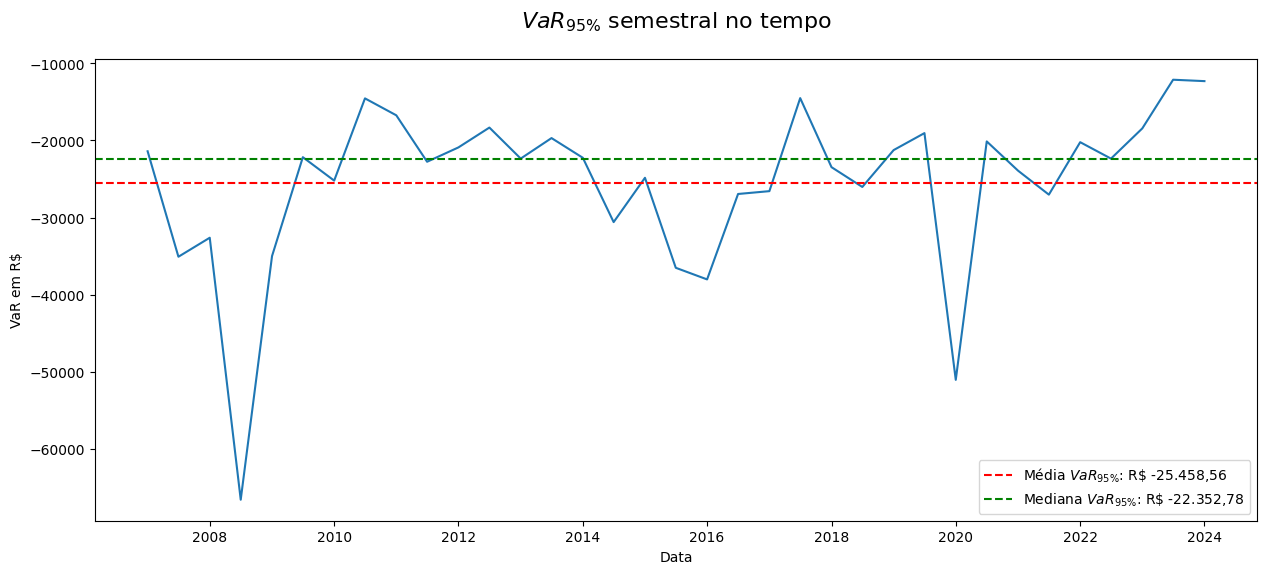

In [269]:
media_VaR = df['VaR Realizado'].mean()
mediana_VaR = df['VaR Realizado'].median()

plt.figure(figsize=(15, 6))
sns.lineplot(df['VaR Realizado'])
plt.axhline(media_VaR, color='red', linestyle='--', label=r'Média $VaR_{95\%}$: '+ f'R\$ {valor(media_VaR)}')
plt.axhline(mediana_VaR, color='green', linestyle='--', label=r'Mediana $VaR_{95\%}$: '+ f'R\$ {valor(mediana_VaR)}')


plt.legend()

plt.title(r'$VaR_{95\%}$ semestral no tempo', y=1.05, fontsize=16)

plt.ylabel('VaR em R$')
plt.xlabel('Data')

plt.show()

A média é mais sensível aos *outliers*, sendo "puxada" por valores extremos. Por outro lado, a mediana, por ser uma medida robusta, é menos influenciada por *outliers* e oferece uma medida central mais estável. No entanto, essa estabilidade pode limitar sua capacidade de refletir mudanças abruptas no valor da carteira, resultando em uma menor taxa de acerto na identificação das perdas reais.

Na próxima etapa, avaliaremos o modelo utilizando o *VaR* do período anterior como preditor, assim como a performance de modelos que utilizam a média móvel de períodos anteriores como preditor.

##### 4.2.2.3 Análise do *VaR* Anterior como Preditor

Para realizar uma análise do *VaR* anterior como preditor, podemos explorar como ele se comporta em relação às perdas observadas em períodos subsequentes.

**Calculando o *VaR*<sub>95%</sub> previsto:**

In [270]:
df_VaR_Anterior = df.copy()

# Adicionar uma coluna 'VaR Previsto' que é o VaR realizado do período anterior
df_VaR_Anterior['VaR Previsto'] = df_VaR_Anterior['VaR Realizado'].shift(1)

# Remover quaisquer linhas com valores NaN resultantes da operação shift
df_VaR_Anterior.dropna(inplace=True)

**Taxa de acertos de valores de perda previsto pelo *VaR*:**

Proporção de cenários otimistas utilizando o VaR anterior como preditor: 50.00%


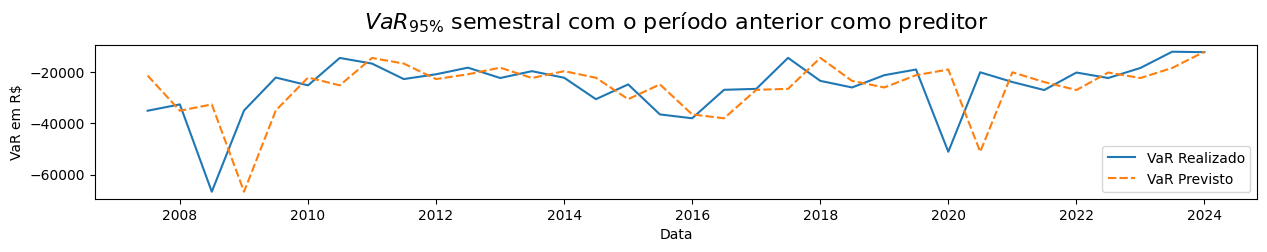

In [271]:
# Identificando acertos de valores previstos pelo VaR
acertos_VaR_anterior = df_VaR_Anterior['VaR Previsto'] <= df_VaR_Anterior['VaR Realizado']

print(f'Proporção de cenários otimistas utilizando o VaR anterior como preditor: {acertos_VaR_anterior.mean():.2%}')

# Visualizando os modelos no tempo
plt.figure(figsize=(15, 2))
sns.lineplot(df_VaR_Anterior[['VaR Realizado', 'VaR Previsto']])
plt.legend()
plt.title(r'$VaR_{95\%}$ semestral com o período anterior como preditor', y=1.05, fontsize=16)

plt.ylabel('VaR em R$')
plt.xlabel('Data')

plt.show()

**Raiz do Erro Quadrático Médio:**

A raiz do erro quadrático médio (RMSE) é uma métrica amplamente utilizada para avaliar a precisão de modelos de previsão ou estimativa, como é o caso do *VaR* (Value at Risk) em finanças. 

O RMSE penaliza de forma mais severa grandes erros de previsão em comparação com métricas como a média dos erros absolutos (MAE). Isso significa que se um evento de perda significativa (como um "Cisne Negro") não é capturado adequadamente pelo modelo, o RMSE refletirá um aumento proporcionalmente maior do erro. Além disso, ele está na mesma escala da variável de interesse (nesse caso, o *VaR*). Isso facilita a compreensão do quanto, em média, o modelo está errando em termos absolutos.

In [272]:
# Calcular o erro como a diferença entre o VaR previsto e o VaR realizado
Erro_VaR_Anterior = df_VaR_Anterior['VaR Previsto'] - df_VaR_Anterior['VaR Realizado']

erro = np.sqrt( (Erro_VaR_Anterior ** 2).mean() )
print(f'O modelo utilizando o VaR anterior como preditor possui um erro de R$ {valor(erro)}')

O modelo utilizando o VaR anterior como preditor possui um erro de R$ 12.676,01


##### 4.2.2.4 Análise da Média Móvel do *VaR* como Preditor
Para calcular a média móvel do *VaR* Realizado onde a média de dois períodos anteriores é usada como previsão para o terceiro período, usaremos o método rolling do pandas com uma janela de 2 períodos e, em seguida, deslocaremos os resultados para alinhar corretamente a previsão com o terceiro período.

In [273]:
# Calculando a média móvel com janela de 2 períodos para VaR Realizado
df_media_movel = df[['VaR Realizado']].copy()
df_media_movel['VaR Previsto'] = df_media_movel['VaR Realizado'].rolling(window=2).mean().shift(1)
df_media_movel.head()

,VaR Realizado,VaR Previsto
Período,,
2007-01-01,-21399.948757,NaN
2007-07-01,-35095.713753,NaN
2008-01-01,-32627.540504,-28247.831255
2008-07-01,-66649.150638,-33861.627129
2009-01-01,-35006.498329,-49638.345571


Calcularemos a média móvel com janelas de vários períodos anteriores e verificaremos qual modelo captura melhor as tendências do *VaR* Realizado no período com o menor erro calculado:

Proporção de cenários otimistas com a média de 2 períodos anteriores como preditor do VaR: 60.61%
O modelo utilizando o VaR médio de 2 períodos anteriores como preditor possui um erro de R$ 11.516,32


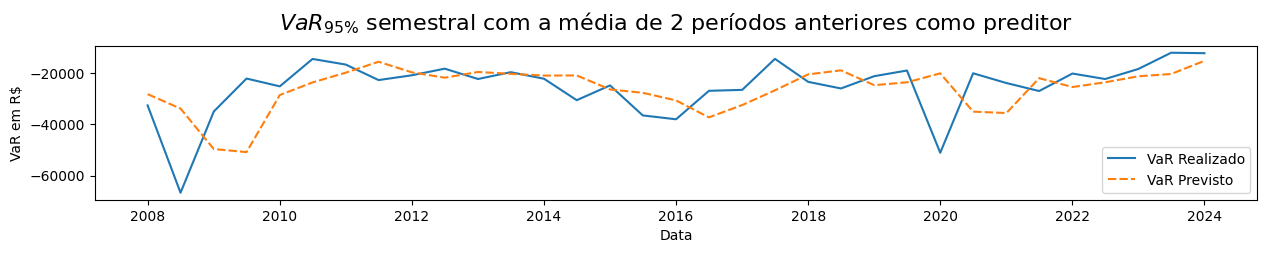

Proporção de cenários otimistas com a média de 3 períodos anteriores como preditor do VaR: 62.50%
O modelo utilizando o VaR médio de 3 períodos anteriores como preditor possui um erro de R$ 11.493,74


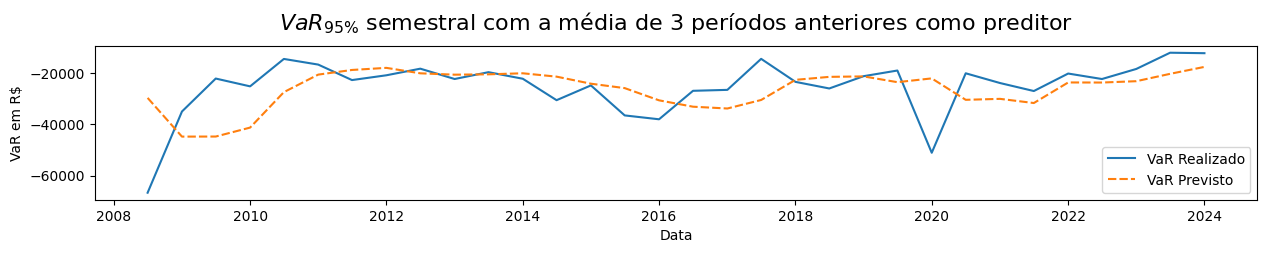

Proporção de cenários otimistas com a média de 4 períodos anteriores como preditor do VaR: 67.74%
O modelo utilizando o VaR médio de 4 períodos anteriores como preditor possui um erro de R$ 10.046,68


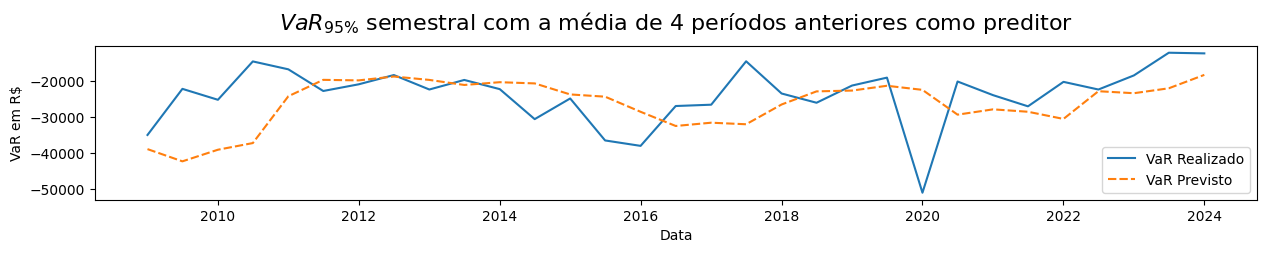

Proporção de cenários otimistas com a média de 5 períodos anteriores como preditor do VaR: 66.67%
O modelo utilizando o VaR médio de 5 períodos anteriores como preditor possui um erro de R$ 10.293,37


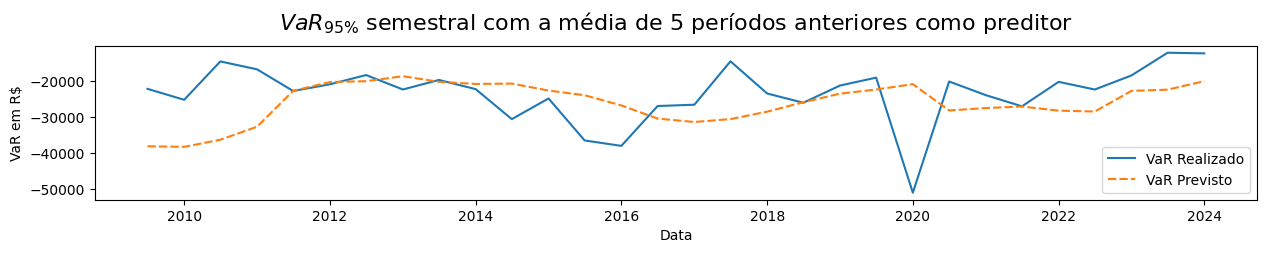

Proporção de cenários otimistas com a média de 6 períodos anteriores como preditor do VaR: 68.97%
O modelo utilizando o VaR médio de 6 períodos anteriores como preditor possui um erro de R$ 9.954,48


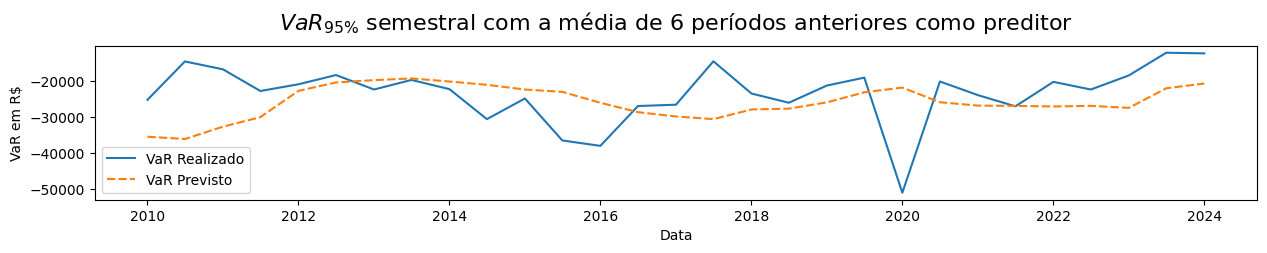

Proporção de cenários otimistas com a média de 7 períodos anteriores como preditor do VaR: 71.43%
O modelo utilizando o VaR médio de 7 períodos anteriores como preditor possui um erro de R$ 10.069,16


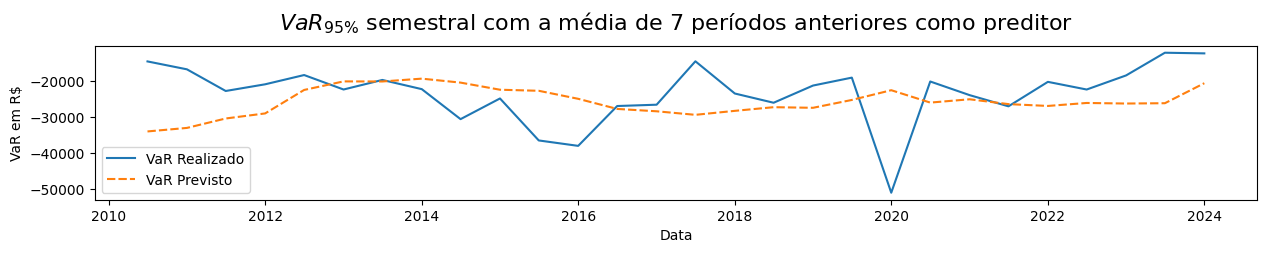

Proporção de cenários otimistas com a média de 8 períodos anteriores como preditor do VaR: 66.67%
O modelo utilizando o VaR médio de 8 períodos anteriores como preditor possui um erro de R$ 9.509,10


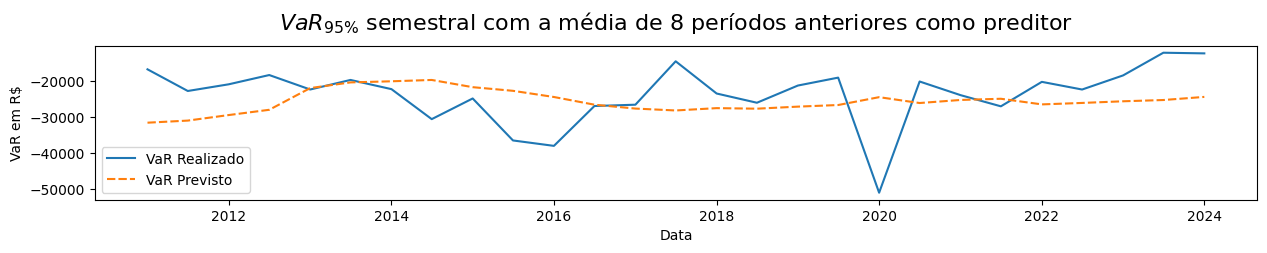

Proporção de cenários otimistas com a média de 9 períodos anteriores como preditor do VaR: 69.23%
O modelo utilizando o VaR médio de 9 períodos anteriores como preditor possui um erro de R$ 9.090,89


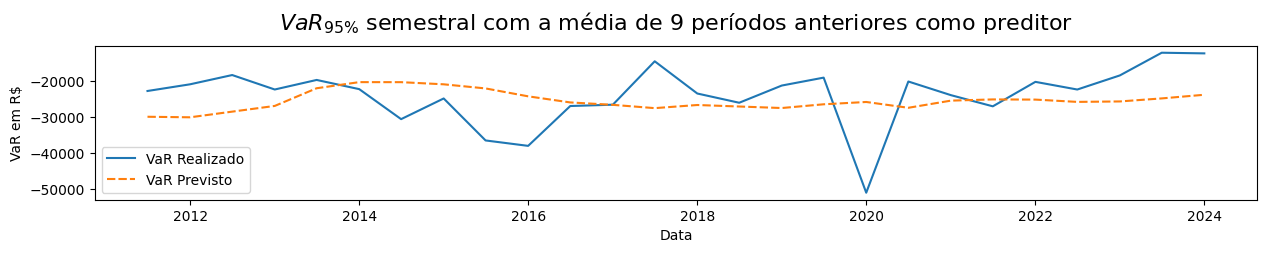

Proporção de cenários otimistas com a média de 10 períodos anteriores como preditor do VaR: 64.00%
O modelo utilizando o VaR médio de 10 períodos anteriores como preditor possui um erro de R$ 9.299,91


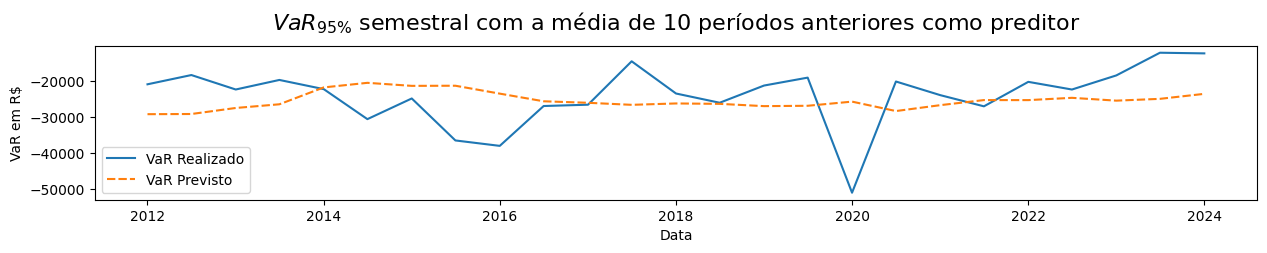

O modelo com 9 períodos possui o menor erro (R$ 9.090,89) com proporção de cenários otimistas de 69.23%


In [274]:
# Calculando a média móvel com janela de vários períodos anteriores para VaR
menor_erro = np.inf
for window in range(2, 11):
    df_media_movel = df[['VaR Realizado']].copy()

    df_media_movel['VaR Previsto'] = df_media_movel['VaR Realizado'].rolling(window=window).mean().shift(1)
    df_media_movel.dropna(inplace=True)

    # Identifica acertos de em modelo utilizando a média como estimador
    acertos_media_movel = df_media_movel['VaR Previsto'] <= df_media_movel['VaR Realizado']
    print(f'Proporção de cenários otimistas com a média de {window} períodos anteriores como preditor do VaR: {acertos_media_movel.mean():.2%}')



    # Calcular o erro como a diferença entre o VaR médio e o VaR realizado
    Erro_VaR_Medio = df_media_movel['VaR Previsto'] - df_media_movel['VaR Realizado']

    erro = np.sqrt( (Erro_VaR_Medio ** 2).mean() )
    print(f'O modelo utilizando o VaR médio de {window} períodos anteriores como preditor possui um erro de R$ {valor(erro)}')

    if erro < menor_erro:
        menor_erro = erro
        periodo = window
        acertos_media = acertos_media_movel

    # Visualizando os modelos no tempo
    plt.figure(figsize=(15, 2))
    sns.lineplot(df_media_movel)
    plt.legend()
    plt.title(r'$VaR_{95\%}$ semestral' + f' com a média de {window} períodos anteriores como preditor', y=1.05, fontsize=16)

    plt.ylabel('VaR em R$')
    plt.xlabel('Data')

    plt.show()

print(f'O modelo com {periodo} períodos possui o menor erro (R$ {valor(menor_erro)}) com proporção de cenários otimistas de {acertos_media.mean():.2%}')


##### 4.2.2.5 Análise de Dias de Perdas Previstos

O objetivo desta etapa será verificar a frequência de dias em que as perdas ficam dentro dos limites estabelecidos pelo *VaR*<sub>95%</sub>.

**Contando os dias com perda maior ou igual ao *VaR* previsto:**

Dias de perda utilizando o VaR médio como preditor:

In [275]:
# Dias de perda utilizando o VaR médio como preditor

# Calculando a média móvel com janela de 9 períodos para VaR Realizado
df_media_movel = df[['VaR Realizado', 'Qtd Dias']].copy()
df_media_movel['VaR Previsto'] = df_media_movel['VaR Realizado'].rolling(window=9).mean().shift(1)
df_media_movel.dropna(inplace=True)

dados_dict = []

# Itera sobre os dados de retornos ponderados
for periodo, dados_periodo in retorno_ponderado[9:]: # Remove os 9 primeiros, pois estes são usado como previsão para o próximo período

    df_periodo = df_media_movel.loc[periodo].copy()

    # Calcula os 5% dos dias do período
    dias_perda_previsto = round(df_periodo['Qtd Dias'] * 0.05)


    VaR_historico = df_periodo['VaR Previsto']


    retornos_diarios = dados_periodo['Retorno ponderado'] * valor_investido
    
    # Contando os dias com retornos menores que o VaR previsto
    dias_perda_realizado = (retornos_diarios < VaR_historico).sum()

    # Cria um dicionário para representar os dados deste período
    dados_perda = {'Período': periodo,
                 'Dias de perda previsto': dias_perda_previsto,
                 'Dias de perda realizado': dias_perda_realizado
                 }

    # Adiciona o dicionário de dados à lista de linhas de VaR
    dados_dict.append(dados_perda)


# Converte a lista de dicionários de VaR em um DataFrame
df_perdas_VaR_Medio = pd.DataFrame(dados_dict)

    # Define 'Período' como o índice do DataFrame
df_perdas_VaR_Medio.set_index('Período', inplace=True)

Dias de perda utilizando o VaR anterior como preditor:

In [276]:
# Dias de perda utilizando o VaR anterior como preditor
dados_dict = []

# Itera sobre os dados de retornos ponderados
for periodo, dados_periodo in retorno_ponderado[1:]: # Remove o primeiro, pois este é usado como previsão para o próximo período

    df_periodo = df_VaR_Anterior.loc[periodo].copy()

    # Calcula os 5% dos dias do periodo
    dias_perda_previsto = round(df_periodo['Qtd Dias'] * 0.05)


    VaR_historico = df_periodo['VaR Previsto']


    retornos_diarios = dados_periodo['Retorno ponderado'] * valor_investido
    
    # Contando os dias com retornos menores que o VaR previsto
    dias_perda_realizado = (retornos_diarios < VaR_historico).sum()

    # Cria um dicionário para representar os dados deste periodo
    dados_perda = {'Período': periodo,
                 'Dias de perda previsto': dias_perda_previsto,
                 'Dias de perda realizado': dias_perda_realizado
                 }

    # Adiciona o dicionário de dados à lista de linhas de VaR
    dados_dict.append(dados_perda)


# Converte a lista de dicionários de VaR em um DataFrame
df_perdas_VaR_Anterior = pd.DataFrame(dados_dict)

    # Define 'Período' como o índice do DataFrame
df_perdas_VaR_Anterior.set_index('Período', inplace=True)

Visualizando os dias de perda:

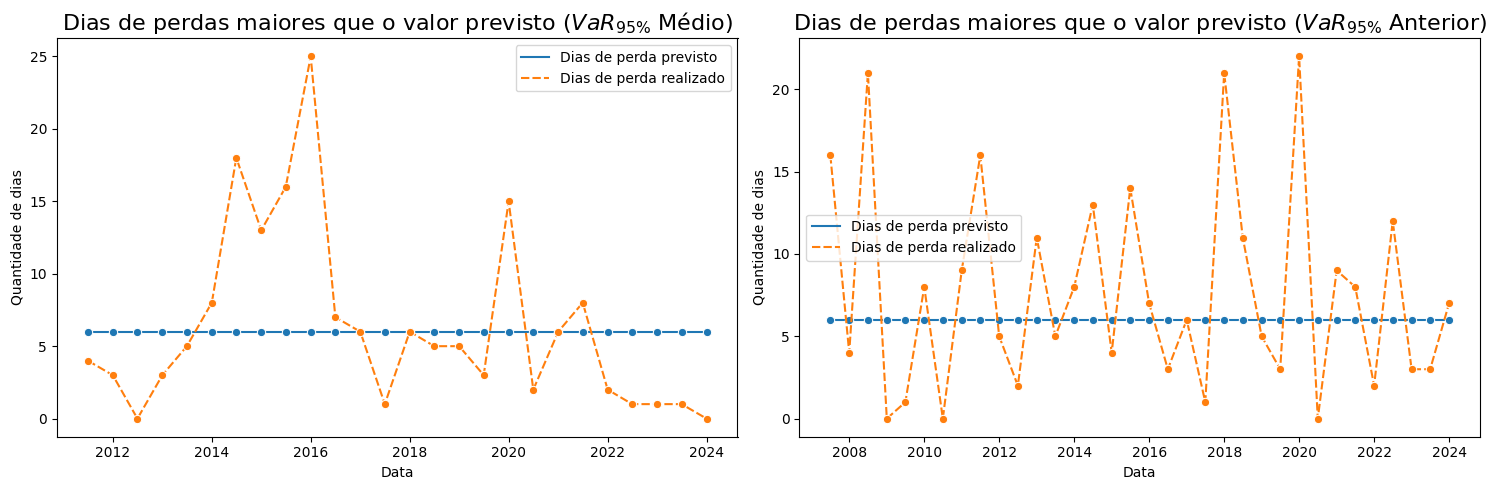

In [277]:
# Visualizando os dias de perda
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotagem do primeiro gráfico de linha
sns.lineplot(df_perdas_VaR_Medio, marker='o', ax=axs[0])
axs[0].set_title(r'Dias de perdas maiores que o valor previsto ($VaR_{95\%}$ Médio)', fontsize=16)
axs[0].set_ylabel('Quantidade de dias')
axs[0].set_xlabel('Data')

# Plotagem do segundo gráfico de linha
sns.lineplot(df_perdas_VaR_Anterior, marker='o', ax=axs[1])
axs[1].set_title(r'Dias de perdas maiores que o valor previsto ($VaR_{95\%}$ Anterior)', fontsize=16)
axs[1].set_ylabel('Quantidade de dias')
axs[1].set_xlabel('Data')

# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()

**Frequência dos dias em que as perdas ficam dentro dos limites estabelecidos pelo *VaR*:**

In [278]:
# Identificando acertos de quatidade de dias estimados pelo VaR Médio
acertos_dias_VaR_Medio = df_perdas_VaR_Medio['Dias de perda previsto'] >= df_perdas_VaR_Medio['Dias de perda realizado']

print(f'Taxa de acertos dos dias de perda utilizando VaR Médio como preditor: {acertos_dias_VaR_Medio.mean():.2%}')

# Identificando acertos de quatidade de dias estimados pelo VaR Anterior
acertos_dias_VaR_Anterior = df_perdas_VaR_Anterior['Dias de perda previsto'] >= df_perdas_VaR_Anterior['Dias de perda realizado']

print(f'Taxa de acertos dos dias de perda utilizando VaR Anterior como preditor: {acertos_dias_VaR_Anterior.mean():.2%}')

Taxa de acertos dos dias de perda utilizando VaR Médio como preditor: 69.23%
Taxa de acertos dos dias de perda utilizando VaR Anterior como preditor: 50.00%


**Teste Exato de Fisher:**

Para testar se a proporção de acertos do VaR médio de 9 períodos anteriores como preditor é estatisticamente maior que a proporção de acertos do *VaR* Anterior como preditor, podemos usar o *Teste Exato de Fisher*.

Este teste é indicado quando o tamanho das duas amostras independentes é pequeno e consiste em determinar a probabilidade exata de ocorrência de uma frequência observada.

- **Hipótese Nula (H0):** A proporção de acertos do VaR médio de 9 períodos anteriores é **igual** a proporção de acertos do *VaR* com apenas um período anterior.

- **Hipótese Alternativa (H1):** A proporção de acertos do VaR médio de 9 períodos anteriores é **maior** que a proporção de acertos do *VaR* com apenas um período anterior.

In [279]:
# Dados para a tabela de contingência 2x2
success_A = acertos_dias_VaR_Medio.sum()
failure_A = (~acertos_dias_VaR_Medio).sum()
success_B = acertos_dias_VaR_Anterior.sum()
failure_B = (~acertos_dias_VaR_Anterior).sum()

# Construindo a tabela de contingência
table = np.array([[success_A, failure_A], [success_B, failure_B]])

# Executando o Teste Exato de Fisher
odds_ratio, p_value = fisher_exact(table, alternative='greater') # alternative='greater': Especifica que estamos interessados em testar se a proporção de sucessos em A é maior do que a proporção de sucessos em B.

print(f"Razão de chances (odds ratio): {odds_ratio}")
print(f"Valor p: {p_value:.4f}")

# Comparando com o nível de significância de 5%
significancia = 0.05
if p_value < significancia:
    print(f'Rejeitamos a hipótese nula:\nHá evidências de que a proporção de acertos do VaR médio de 9 periodos anteriores é maior que a proporção de acertos do VaR com apenas um periodo anterior.')
else:
    print(f'Aceitamos a hipótese nula:\nNão há evidências suficientes para afirmar que a proporção de acertos do VaR médio de 9 periodos anteriores é maior que a proporção de acertos do VaR com apenas um periodo anterior.')

Razão de chances (odds ratio): 2.25
Valor p: 0.1084
Aceitamos a hipótese nula:
Não há evidências suficientes para afirmar que a proporção de acertos do VaR médio de 9 periodos anteriores é maior que a proporção de acertos do VaR com apenas um periodo anterior.


**Conclusão:**

Embora o modelo que utiliza o *VaR* médio dos 9 períodos anteriores como preditor apresente uma razão de chances de sucesso 2,25 vezes maior em comparação ao modelo que utiliza o *VaR* de um período anterior, sugerindo um potencial de melhor desempenho, a falta de significância estatística indica que essa aparente vantagem pode ser atribuída ao acaso.

Assim, com 95% de confiança, podemos concluir que as proporções de acerto dos dois modelos são estatisticamente indistinguíveis. Isso significa que ambos os modelos têm, essencialmente, a mesma capacidade preditiva.

##### 4.2.2.6 Análise dos Erros dos Modelos

**Dispersão dos erros do modelo:**

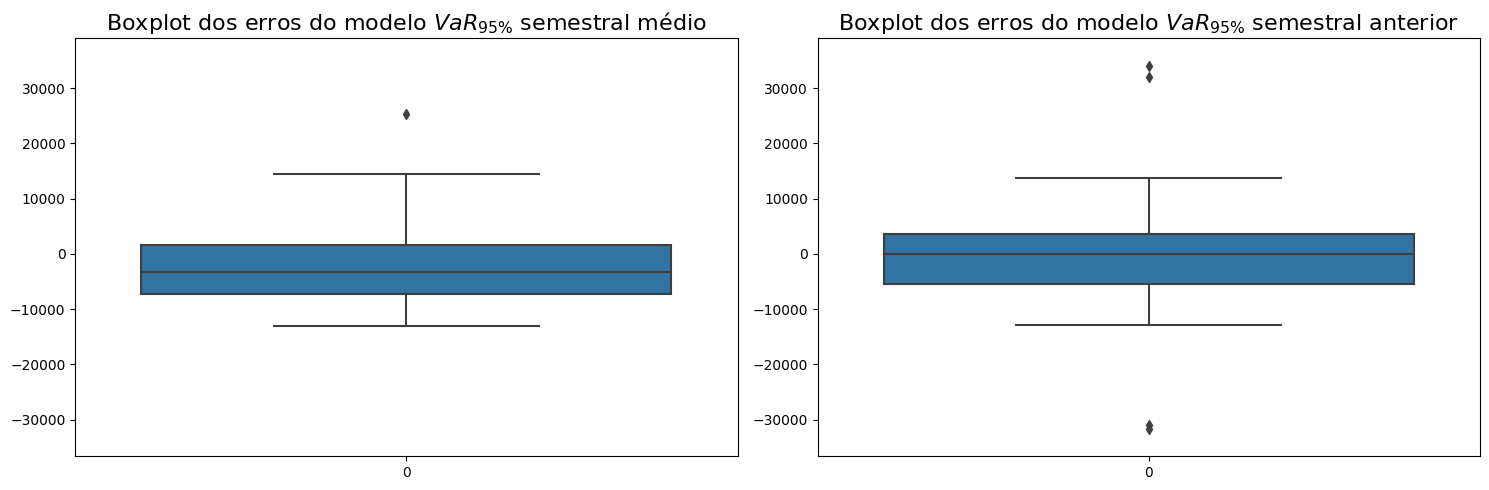

In [280]:
# Calcular o erro como a diferença entre o VaR Previsto e o VaR realizado
Erro_VaR_Medio = df_media_movel['VaR Previsto'] - df_media_movel['VaR Realizado']

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotagem do primeiro gráfico
sns.boxplot(Erro_VaR_Medio, ax=axs[0])

axs[0].set_title(r'Boxplot dos erros do modelo $VaR_{95\%}$ semestral médio', fontsize=16)

# Plotagem do segundo gráfico
sns.boxplot(Erro_VaR_Anterior, ax=axs[1])

axs[1].set_title(r'Boxplot dos erros do modelo $VaR_{95\%}$ semestral anterior', fontsize=16)


# Definindo o mesmo eixo y para ambos os subplots
y_min = min(min(Erro_VaR_Medio), min(Erro_VaR_Anterior)) - 5000
y_max = max(max(Erro_VaR_Medio), max(Erro_VaR_Anterior)) + 5000
for ax in axs:
    ax.set_ylim(y_min, y_max)


# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()

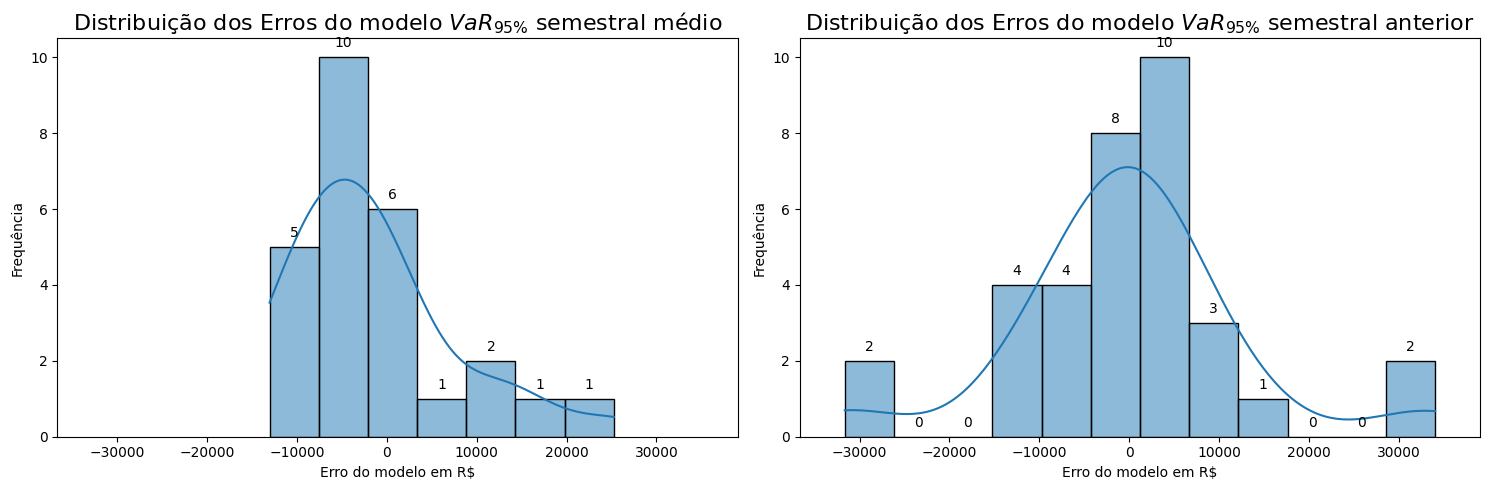

In [281]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotagem do primeiro histograma
sns.histplot(Erro_VaR_Medio, kde=True, ax=axs[0])
axs[0].set_title(r'Distribuição dos Erros do modelo $VaR_{95\%}$ semestral médio', fontsize=16)
axs[0].set_xlabel('Erro do modelo em R$')
axs[0].set_ylabel('Frequência')

# Adicionando as frequências no topo das barras
for patch in axs[0].patches:
    height = patch.get_height()
    axs[0].annotate(f'{height:.0f}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom')

# Plotagem do segundo histograma
sns.histplot(Erro_VaR_Anterior, kde=True, ax=axs[1])
axs[1].set_title(r'Distribuição dos Erros do modelo $VaR_{95\%}$ semestral anterior', fontsize=16)
axs[1].set_xlabel('Erro do modelo em R$')
axs[1].set_ylabel('Frequência')

# Adicionando as frequências no topo das barras
for patch in axs[1].patches:
    height = patch.get_height()
    axs[1].annotate(f'{height:.0f}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom')
    
# Definindo o mesmo eixo x para ambos os subplots
x_min = min(min(Erro_VaR_Medio), min(Erro_VaR_Anterior)) - 5000
x_max = max(max(Erro_VaR_Medio), max(Erro_VaR_Anterior)) + 5000
for ax in axs:
    ax.set_xlim(x_min, x_max)

# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()

Ao analisar os gráficos de boxplot e frequência dos erros dos modelos, observamos que o *VaR*<sub>95%</sub> semestral médio, calculado com uma média móvel de 9 períodos, apresenta apenas um *outlier*, enquanto o *VaR*<sub>95%</sub> semestral anterior possui quatro. Isso ocorre porque a média móvel utilizou um dos períodos de crise (2008) para calcular o *VaR* previsto, enquanto o *VaR*<sub>95%</sub> semestral anterior tentou prever esse período. Além disso, a média móvel suaviza a previsão, "puxando" a média para baixo em cenários pós-crise, enquanto o *VaR* anterior apresenta erros tanto no período da crise quanto no período seguinte.

## 5. Validação do trabalho

### 5.1 Verificação dos critérios de sucesso

Nesta etapa, avaliaremos se os resultados são satisfatórios e revisaremos todo o processo para identificar falhas, garantindo a validação do estudo antes da conclusão.

**Critérios de Sucesso:**

- [x] Resposta clara à pergunta de negócio.

- [x] Verificação com *backtest* em series semestrais.

- [x] Comparação entre diferentes modelos de *VaR*, como o uso de médias móveis de períodos anteriores versus VaR de um único período anterior.

- [x] O erro do modelo deve ser menor que 1% do valor do portifólio (erro < R\$ 10.000,00).

- [ ] O modelo deve ser capaz de prever a quantidade de dias de perdas esperadas com pelo menos 90% de taxa de acerto.

## 6. Considerações finais

Este estudo investigou a eficácia do *VaR* como modelo estatístico para prever as perdas futuras de ativos reais listados na bolsa de valores brasileira Brasil, Bolsa e Balcão (B3). Para tanto, realizou-se um *backtest* de modelos *VaR*<sub>95%</sub> em séries semestrais em uma base de dados abrangendo o período de 02/01/2007 a 27/06/2024.

O modelo utilizando o *VaR* do semestre anterior como preditor apresentou um erro médio de R\$ 12.676,01 e uma taxa de acerto na quantidade dos dias de perda de 50% enquanto o modelo com a média de 9 períodos semestrais anteriores apresentou um erro de R\$ 9.090,89 com a taxa de acerto de 69,23%. 

Embora o segundo modelo tenha apresentado uma taxa de acerto maior, o teste de hipóteses indicou que a proporção de acertos dos dois modelos são estatisticamente iguais, com uma confiança de 95%. Isso sugere que nenhum dos modelos oferece uma previsão substancialmente melhor do que o outro em termos de quantidade de dias de perdas esperados. No entanto, os erros mostram que o *VaR* do período anterior tende a ser mais penalizado do que a média móvel de períodos semestrais. Isso ocorre porque o modelo falha tanto no período anterior quanto no próximo, ao assumir uma previsão que é discrepante.

A economia brasileira é marcada por constantes instabilidades, que podem ser originadas tanto por crises internas iniciadas no país quanto por crises externas que afetam o Brasil como resultado de eventos iniciados em outros países. Só no período de estudo, observamos 3 destas crises entre os 35 semestres de nossa base de dados. Isso significa que 8,57% dos semestres podem ser considerados "Cisnes Negros" em nossa carteira, com potencial para desestabilizar as estimativas do *VaR*.

Além disso, é importante reconhecer que os dados de perda estimados pelo *VaR* podem ser influenciados por outros fatores externos, como a dependência das ações em relação a *commodities*, ciclos de demanda, mudanças nas políticas econômicas incluindo os eventos imprevisíveis, como os "Cisnes Negros". Esses fatores podem introduzir variabilidade adicional nos retornos dos ativos, afetando a precisão dos modelos preditivos.

Portanto, apesar de o *VaR* não conseguir prever com eficiência as perdas para esta carteira na bolsa de valores brasileira, ele continua sendo uma ferramenta útil na gestão de risco, mas sua aplicação deve ser complementada por outras abordagens e análises críticas constante, especialmente em contextos de alta volatilidade e incerteza. A capacidade de um modelo de previsão deve ser continuamente avaliada e ajustada para refletir as condições de mercado em mudança, garantindo assim uma gestão de risco mais robusta e eficaz.